# <font color = 'color'>블록 딥러닝(4장추가) 사전훈련 컨브넷사용_강아지&고양이 이미지 분류예측</font>

# <font color = 'blue'>문제 정의</font>

### 사전에 훈련된 대규모 이미지 인식 모델(VGG16 Pre-Trained Model)
* 분류(classification) 문제
* 16층 구조의 신경망 레이어를 통해서 이미지를 분류예측하는 문제상황
* 총 1,400만 개 이상의 이미지로 구성된 ImageNet으로 학습을 실시하여 1000개의 범주로 분류하는 모델
* CNN 알고리즘을 기반한 모델을 옥스퍼드 대학의 Visual Geometry Group이라는 팀에서 설계했다고 하여 VGGnet이라 불림
<img src = './../../images/vgg16.png'>

1. 피처(입력/예측/독립)변수
    * 애완동물 컬러이미지 픽셀특성(가로150 X 세로150 픽셀별 색상농도, 컬러채널RGB) <pre>
1. 타깃(출력/반응/종속)변수
    * 2개의 애완동물 이미지 범주 ==> 0: cat(고양이), 1: dog(강아지)

# <font color = 'blue'>컨브넷을 이용한 간단한 이미지 분류</font>

### 관련 라이브러리 모듈 로딩

In [1]:
# 컨브넷 사용을 위한 관련 라이브러리와 모듈 로딩
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions

from keras.applications import imagenet_utils
from keras.preprocessing.image import load_img, img_to_array 

Using TensorFlow backend.


### 컨브넷 모델 설계내용

In [2]:
# 컨브넷 모델 구성하기
model = VGG16(weights='imagenet')

# - Keras는 인터넷에서 528M 정도 용량을 가진 베스트모델과 가중치가 저장되어 있는 
#   파일을 다운로드하여 보통 C:\Users\사용자폴더명\.keras\models 디렉토리에 저장함
# - 해당 링크사이트에서 vgg16_weights.h5라는 파일명으로 다운로드되며, 
#   재로딩시에는 해당 폴더에서 모델파일이 로딩됨

In [3]:
# 컨브넷 모델 설계내용 확인
model.summary()

# - 입력층의 구조가 가로 224, 세로 224, 컬러채널3 으로 설정되어 있음
# - 출력층에서 노드가 1000으로 설정되어 있어 1000개 레이블로 분류예측이 가능한 모델임

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

덴스층 = 밀집망 = 선연결 = 완전연결으로 불림 <br>

flatten에 넣어서 1차원으로 만들어줌 <br>

위에 conv2는 컨벌루젼 신경망이고 밑에는 dense층

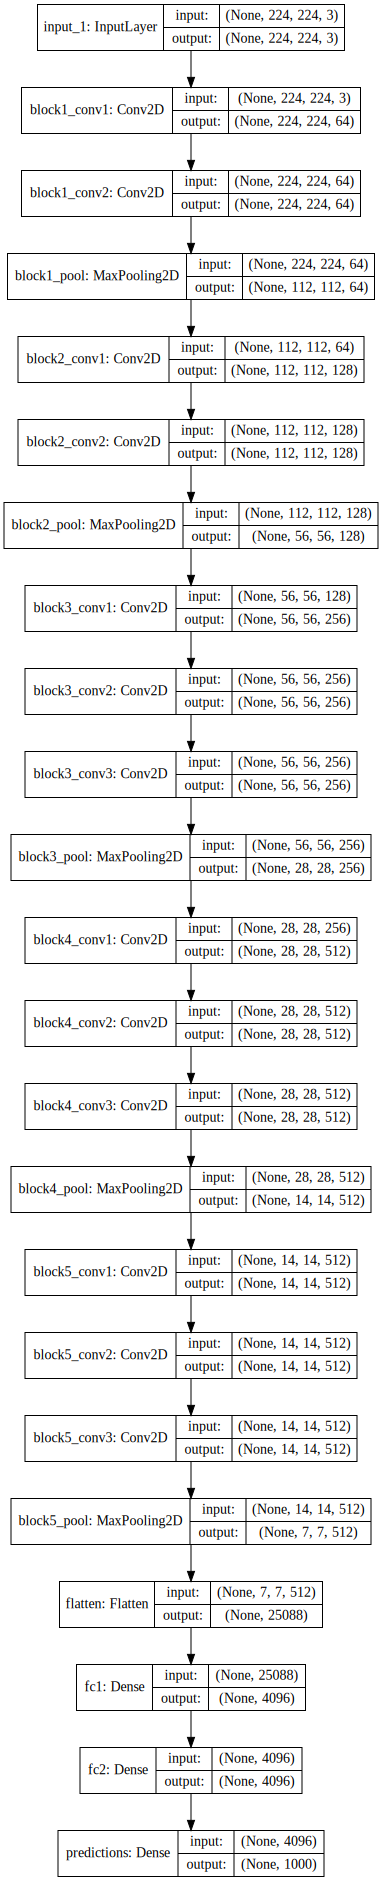

In [4]:
# 컨브넷 모델 벡터이미지로 시각화
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes = True).create(prog = 'dot', format = 'svg'))

### 컨브넷 모델 분류레이블

In [5]:
import json
with open('./../../datapic/vgg/imagenet_class_index.json') as f:
    data = json.load(f)

In [6]:
print(type(data))
data

<class 'dict'>


{'0': ['n01440764', 'tench'],
 '1': ['n01443537', 'goldfish'],
 '2': ['n01484850', 'great_white_shark'],
 '3': ['n01491361', 'tiger_shark'],
 '4': ['n01494475', 'hammerhead'],
 '5': ['n01496331', 'electric_ray'],
 '6': ['n01498041', 'stingray'],
 '7': ['n01514668', 'cock'],
 '8': ['n01514859', 'hen'],
 '9': ['n01518878', 'ostrich'],
 '10': ['n01530575', 'brambling'],
 '11': ['n01531178', 'goldfinch'],
 '12': ['n01532829', 'house_finch'],
 '13': ['n01534433', 'junco'],
 '14': ['n01537544', 'indigo_bunting'],
 '15': ['n01558993', 'robin'],
 '16': ['n01560419', 'bulbul'],
 '17': ['n01580077', 'jay'],
 '18': ['n01582220', 'magpie'],
 '19': ['n01592084', 'chickadee'],
 '20': ['n01601694', 'water_ouzel'],
 '21': ['n01608432', 'kite'],
 '22': ['n01614925', 'bald_eagle'],
 '23': ['n01616318', 'vulture'],
 '24': ['n01622779', 'great_grey_owl'],
 '25': ['n01629819', 'European_fire_salamander'],
 '26': ['n01630670', 'common_newt'],
 '27': ['n01631663', 'eft'],
 '28': ['n01632458', 'spotted_salama

### 예제 데이터 준비

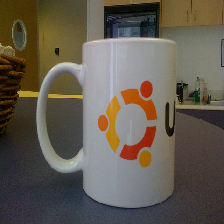

In [7]:
# 분석대상 예제 이미지 로딩
img = load_img('./../../datapic/vgg/mug.jpg', target_size = (224, 224))
img

In [8]:
# 이미지형식을 넘파이 다차원 배열 수치로 변형
ex = img_to_array(img)
ex

array([[[ 64.,  54.,   3.],
        [ 64.,  57.,   3.],
        [ 78.,  53.,   0.],
        ...,
        [117.,  91.,  64.],
        [111.,  88.,  44.],
        [107.,  81.,  64.]],

       [[ 73.,  49.,   5.],
        [ 66.,  57.,   0.],
        [ 62.,  54.,   8.],
        ...,
        [118.,  90.,  53.],
        [122.,  92.,  56.],
        [ 95.,  64.,  35.]],

       [[ 67.,  56.,   2.],
        [ 71.,  52.,  10.],
        [ 71.,  55.,   0.],
        ...,
        [120.,  90.,  66.],
        [127.,  99.,  62.],
        [104.,  74.,  46.]],

       ...,

       [[ 40.,  47.,  57.],
        [ 48.,  43.,  66.],
        [ 48.,  54.,  52.],
        ...,
        [ 36.,  42.,  32.],
        [ 50.,  47.,  38.],
        [ 50.,  43.,  35.]],

       [[ 45.,  43.,  57.],
        [ 49.,  49.,  57.],
        [ 43.,  46.,  55.],
        ...,
        [ 28.,  48.,  36.],
        [ 48.,  40.,  37.],
        [ 56.,  49.,  43.]],

       [[ 45.,  42.,  59.],
        [ 47.,  48.,  53.],
        [ 57.,  

In [9]:
# 넘파이 다차원 배열을 (이미지번호,행픽셀, 열픽샐, 채널)의 4차원 구조로 재구성 -> vgg에서 해당하는 이미지별로 4차원으로 재 구조화
# - 1000개 레이블을 학습한 imageNet에 이러한 구조로 되어 있어서 재구성을 하는 것임
ex = ex.reshape((1, ex.shape[0], ex.shape[1], ex.shape[2])) # 1은 이미지 번호를 의미
ex

array([[[[ 64.,  54.,   3.],
         [ 64.,  57.,   3.],
         [ 78.,  53.,   0.],
         ...,
         [117.,  91.,  64.],
         [111.,  88.,  44.],
         [107.,  81.,  64.]],

        [[ 73.,  49.,   5.],
         [ 66.,  57.,   0.],
         [ 62.,  54.,   8.],
         ...,
         [118.,  90.,  53.],
         [122.,  92.,  56.],
         [ 95.,  64.,  35.]],

        [[ 67.,  56.,   2.],
         [ 71.,  52.,  10.],
         [ 71.,  55.,   0.],
         ...,
         [120.,  90.,  66.],
         [127.,  99.,  62.],
         [104.,  74.,  46.]],

        ...,

        [[ 40.,  47.,  57.],
         [ 48.,  43.,  66.],
         [ 48.,  54.,  52.],
         ...,
         [ 36.,  42.,  32.],
         [ 50.,  47.,  38.],
         [ 50.,  43.,  35.]],

        [[ 45.,  43.,  57.],
         [ 49.,  49.,  57.],
         [ 43.,  46.,  55.],
         ...,
         [ 28.,  48.,  36.],
         [ 48.,  40.,  37.],
         [ 56.,  49.,  43.]],

        [[ 45.,  42.,  59.],
       

In [10]:
# 채널별 컬러 정규화 수행
xhat = preprocess_input(ex)
xhat

# - vgg모델은 카페(Caffe) 프레임워크에서 딥러닝 훈련모델을 만든 것으로
#   입력이미지 색상채널을 RGB에서 BGR로 변경해 주는 것임

array([[[[-100.939    ,  -62.779    ,  -59.68     ],
         [-100.939    ,  -59.779    ,  -59.68     ],
         [-103.939    ,  -63.779    ,  -45.68     ],
         ...,
         [ -39.939003 ,  -25.779    ,   -6.6800003],
         [ -59.939003 ,  -28.779    ,  -12.68     ],
         [ -39.939003 ,  -35.779    ,  -16.68     ]],

        [[ -98.939    ,  -67.779    ,  -50.68     ],
         [-103.939    ,  -59.779    ,  -57.68     ],
         [ -95.939    ,  -62.779    ,  -61.68     ],
         ...,
         [ -50.939003 ,  -26.779    ,   -5.6800003],
         [ -47.939003 ,  -24.779    ,   -1.6800003],
         [ -68.939    ,  -52.779    ,  -28.68     ]],

        [[-101.939    ,  -60.779    ,  -56.68     ],
         [ -93.939    ,  -64.779    ,  -52.68     ],
         [-103.939    ,  -61.779    ,  -52.68     ],
         ...,
         [ -37.939003 ,  -26.779    ,   -3.6800003],
         [ -41.939003 ,  -17.779    ,    3.3199997],
         [ -57.939003 ,  -42.779    ,  -19.68     ]],

In [11]:
# 컨브넷을 활용한 임의의 이미지로 분류 예측하기
yhat = model.predict(xhat)
yhat
# - 1000개의 알려진 객체 유형 중에서 어떤 이미지로 분류되는지 확률값을 확인

array([[7.46646123e-09, 1.18957360e-07, 1.61559499e-09, 6.69611033e-09,
        1.50035611e-08, 3.88458226e-08, 5.14524157e-09, 1.12834584e-07,
        1.06853889e-07, 1.31564207e-07, 7.16784001e-08, 3.03530783e-07,
        2.20922558e-07, 3.90760420e-08, 1.46355774e-07, 4.66080543e-08,
        6.21918304e-08, 5.46117604e-08, 7.39889927e-08, 1.38314036e-07,
        3.85590182e-09, 1.47633470e-08, 1.31194771e-08, 4.30811546e-08,
        5.31819957e-08, 1.23997070e-08, 2.83293442e-08, 1.87693658e-07,
        2.62537370e-08, 1.61781759e-06, 2.02956745e-08, 2.15941995e-07,
        7.99497712e-08, 1.68464496e-08, 8.43119263e-09, 5.95372374e-09,
        6.66525182e-08, 1.39984673e-08, 3.98996036e-08, 3.00059888e-08,
        3.77384488e-08, 2.02664694e-08, 2.04160724e-08, 2.23889511e-08,
        4.62807321e-08, 2.21660144e-07, 1.15475139e-07, 2.83632993e-08,
        3.23092202e-08, 1.77800636e-08, 2.14646523e-08, 3.26552332e-08,
        1.48767185e-07, 6.09307875e-08, 6.03349761e-08, 8.617023

In [12]:
# 컨브넷 분류예측 결과 확인하기
result = decode_predictions(yhat)
result

# - 1000개 객체 유형 중에서 확률값 상위 5개를 보여줌
# - imagenetID, label, proporion 순으로 나타남

[[('n03063599', 'coffee_mug', 0.75266165),
  ('n03063689', 'coffeepot', 0.08365986),
  ('n07930864', 'cup', 0.06440082),
  ('n04398044', 'teapot', 0.030264245),
  ('n03950228', 'pitcher', 0.025889616)]]

In [13]:
# 1순위 분류예측 결과
result[0]

[('n03063599', 'coffee_mug', 0.75266165),
 ('n03063689', 'coffeepot', 0.08365986),
 ('n07930864', 'cup', 0.06440082),
 ('n04398044', 'teapot', 0.030264245),
 ('n03950228', 'pitcher', 0.025889616)]

In [14]:
# 1순위 분류예측 결과
result[0][0]

('n03063599', 'coffee_mug', 0.75266165)

In [15]:
# 1순위 분류예측 결과
print('%s (%.2f%%)' % (result[0][0][1], result[0][0][2] * 100))

coffee_mug (75.27%)


In [16]:
# 컨브넷 분류예측 결과 리스트
for (i, (imagenetID, label, prob)) in enumerate(result[0]):
    print("{}. {}: {:5.2f}%".format(i + 1, label, prob * 100))

1. coffee_mug: 75.27%
2. coffeepot:  8.37%
3. cup:  6.44%
4. teapot:  3.03%
5. pitcher:  2.59%


### 또 다른 예제 데이터 준비

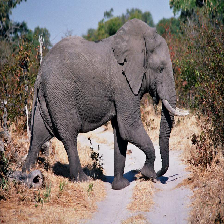

In [17]:
# 분석대상 예제 이미지 로딩
img = load_img('./../../datapic/vgg/elephant.jpg', target_size = (224, 224))
img

코끼리 이미지는 지구상에 존재하는 이미지가 모두 동일하기 때문에, 기존에 남이 만든 best model을 사용해도 좋다
그래서 pre-train 기법이 생김. 어차피 이미지 비슷한데 뭐하러 다시 학습하냐. 기존에 남이 만든 best model 사용하면 좋다. 

In [18]:
# 이미지형식을 넘파이 다차원 배열 수치로 변형
ex = img_to_array(img)
ex

array([[[ 91.,  93.,  72.],
        [ 79.,  84.,  80.],
        [ 79.,  84.,  78.],
        ...,
        [ 35.,  63.,  38.],
        [ 33.,  59.,  46.],
        [ 32.,  52.,  40.]],

       [[ 73.,  74.,  60.],
        [ 47.,  58.,  42.],
        [ 70.,  82.,  72.],
        ...,
        [ 40.,  68.,  45.],
        [ 27.,  54.,  37.],
        [ 18.,  39.,  22.]],

       [[ 74.,  75.,  67.],
        [ 65.,  79.,  53.],
        [ 66.,  83.,  67.],
        ...,
        [ 35.,  65.,  41.],
        [ 29.,  59.,  35.],
        [ 22.,  46.,  20.]],

       ...,

       [[141., 108.,  91.],
        [139.,  76.,  67.],
        [ 77.,  15.,   2.],
        ...,
        [ 99.,  88.,  68.],
        [ 27.,   6.,   3.],
        [102.,  77.,  47.]],

       [[156., 121., 102.],
        [127.,  71.,  58.],
        [120.,  62.,  50.],
        ...,
        [ 65.,  49.,  49.],
        [ 66.,  46.,  39.],
        [ 62.,  36.,  11.]],

       [[142., 104.,  85.],
        [149., 112.,  93.],
        [169., 1

In [19]:
# 넘파이 다차원 배열의 차원구조를 재구성
ex = ex.reshape((1, ex.shape[0], ex.shape[1], ex.shape[2]))
ex

# - 기존 (행픽셀, 열픽샐, 색상채널)의 3차원 구조
# - 변경 (이미지번호, 행픽셀, 열픽샐, 색상채널)의 4차원 구조
# - 1000개 레이블을 학습한 imageNet에 이러한 구조로 되어 있어서 재구성을 하는 것임

array([[[[ 91.,  93.,  72.],
         [ 79.,  84.,  80.],
         [ 79.,  84.,  78.],
         ...,
         [ 35.,  63.,  38.],
         [ 33.,  59.,  46.],
         [ 32.,  52.,  40.]],

        [[ 73.,  74.,  60.],
         [ 47.,  58.,  42.],
         [ 70.,  82.,  72.],
         ...,
         [ 40.,  68.,  45.],
         [ 27.,  54.,  37.],
         [ 18.,  39.,  22.]],

        [[ 74.,  75.,  67.],
         [ 65.,  79.,  53.],
         [ 66.,  83.,  67.],
         ...,
         [ 35.,  65.,  41.],
         [ 29.,  59.,  35.],
         [ 22.,  46.,  20.]],

        ...,

        [[141., 108.,  91.],
         [139.,  76.,  67.],
         [ 77.,  15.,   2.],
         ...,
         [ 99.,  88.,  68.],
         [ 27.,   6.,   3.],
         [102.,  77.,  47.]],

        [[156., 121., 102.],
         [127.,  71.,  58.],
         [120.,  62.,  50.],
         ...,
         [ 65.,  49.,  49.],
         [ 66.,  46.,  39.],
         [ 62.,  36.,  11.]],

        [[142., 104.,  85.],
       

In [20]:
# 채널별 컬러 정규화 수행
xhat = preprocess_input(ex)
xhat

# - vgg모델은 카페(Caffe) 프레임워크에서 딥러닝 훈련모델을 만든 것으로
#   입력이미지 색상채널을 RGB에서 BGR로 변경해 주는 것임

array([[[[ -31.939003 ,  -23.779    ,  -32.68     ],
         [ -23.939003 ,  -32.779    ,  -44.68     ],
         [ -25.939003 ,  -32.779    ,  -44.68     ],
         ...,
         [ -65.939    ,  -53.779    ,  -88.68     ],
         [ -57.939003 ,  -57.779    ,  -90.68     ],
         [ -63.939003 ,  -64.779    ,  -91.68     ]],

        [[ -43.939003 ,  -42.779    ,  -50.68     ],
         [ -61.939003 ,  -58.779    ,  -76.68     ],
         [ -31.939003 ,  -34.779    ,  -53.68     ],
         ...,
         [ -58.939003 ,  -48.779    ,  -83.68     ],
         [ -66.939    ,  -62.779    ,  -96.68     ],
         [ -81.939    ,  -77.779    , -105.68     ]],

        [[ -36.939003 ,  -41.779    ,  -49.68     ],
         [ -50.939003 ,  -37.779    ,  -58.68     ],
         [ -36.939003 ,  -33.779    ,  -57.68     ],
         ...,
         [ -62.939003 ,  -51.779    ,  -88.68     ],
         [ -68.939    ,  -57.779    ,  -94.68     ],
         [ -83.939    ,  -70.779    , -101.68     ]],

In [21]:
# 컨브넷을 활용한 임의의 이미지로 분류 예측하기
yhat = model.predict(xhat)
yhat
# - 1000개의 알려진 객체 유형 중에서 어떤 이미지로 분류되는지 확률값을 확인

array([[1.31563690e-10, 1.19789985e-12, 5.22571830e-12, 1.02227801e-11,
        1.06233199e-11, 1.39755490e-11, 7.53671257e-12, 3.27861037e-11,
        1.19123600e-11, 7.23098168e-08, 8.83062015e-13, 9.97250676e-13,
        6.23050223e-13, 9.34148592e-13, 3.78230997e-12, 6.59074965e-12,
        1.24987937e-11, 1.89939349e-11, 2.06233051e-11, 2.18254993e-12,
        4.56660230e-12, 4.67768380e-10, 7.10837389e-10, 1.03499884e-08,
        1.95638991e-10, 3.60831352e-12, 3.40223054e-12, 1.87837419e-12,
        1.62609975e-12, 1.02723090e-11, 3.75749562e-12, 3.31125058e-12,
        9.11060897e-12, 3.79300591e-10, 1.54012947e-09, 1.94150959e-10,
        1.50349053e-10, 2.95348598e-12, 4.31708107e-11, 1.63024805e-09,
        1.86572077e-11, 2.50559799e-11, 3.86887855e-10, 1.50394452e-09,
        8.14964242e-12, 1.59542851e-10, 2.74936376e-11, 1.09607401e-09,
        2.23390217e-07, 5.02804420e-09, 3.84334203e-10, 3.90406012e-06,
        2.09226690e-12, 1.00801780e-11, 6.88857435e-12, 3.969516

In [22]:
# 컨브넷 분류예측 결과 확인하기
result = decode_predictions(yhat)
result

# - 1000개 객체 유형 중에서 확률값 상위 5개를 보여줌
# - imagenetID, label, proporion 순으로 나타남

[[('n02504458', 'African_elephant', 0.49053732),
  ('n01871265', 'tusker', 0.46276724),
  ('n02504013', 'Indian_elephant', 0.04667721),
  ('n02397096', 'warthog', 6.605727e-06),
  ('n01704323', 'triceratops', 3.90406e-06)]]

In [23]:
# 1순위 분류예측 결과
result[0]

[('n02504458', 'African_elephant', 0.49053732),
 ('n01871265', 'tusker', 0.46276724),
 ('n02504013', 'Indian_elephant', 0.04667721),
 ('n02397096', 'warthog', 6.605727e-06),
 ('n01704323', 'triceratops', 3.90406e-06)]

In [24]:
# 1순위 분류예측 결과
result[0][0]

('n02504458', 'African_elephant', 0.49053732)

In [25]:
# 1순위 분류예측 결과
print('%s (%.2f%%)' % (result[0][0][1], result[0][0][2] * 100))

African_elephant (49.05%)


In [26]:
# 컨브넷 분류예측 결과 리스트
for (i, (imagenetID, label, prob)) in enumerate(result[0]):
    print("{}. {}: {:5.2f}%".format(i + 1, label, prob * 100))

1. African_elephant: 49.05%
2. tusker: 46.28%
3. Indian_elephant:  4.67%
4. warthog:  0.00%
5. triceratops:  0.00%


# <font color = 'blue'>데이터 준비</font>

### 시각화 모듈로딩 및 한글폰트 작업

In [27]:
# 시각화 작업을 위한 모듈 로딩작업
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager

In [28]:
# 사용을 원하는 한글폰트에 대한 공식이름 확인
font_name = font_manager.FontProperties(fname = "./fonts/malgun.ttf").get_name()
print(font_name)

font_name = font_manager.FontProperties(fname = "./fonts/NanumGothic.ttf").get_name()
print(font_name)

# 해당 한글폰트를 파이선 그래프에서 사용가능하도록 설정
plt.rcParams["font.family"] = font_name
plt.rcParams['axes.unicode_minus'] = False

Malgun Gothic
NanumGothic


### 기본 라이브러리 로딩

In [29]:
# 기본 라이브러리 로딩
import numpy as np
import pandas as pd
import os, shutil

# 워닝메시지 출력관련 모듈로딩
import warnings

warnings.filterwarnings(action = 'ignore') 
# - 출력되는 경고메시지를 무시하고 숨김

# warnings.filterwarnings(action = 'default')
# - 다시 경고메시지가 나타나도록 함

### 이미지 파일 저장폴더 확인

In [30]:
# 현재 작업경로 확인
import os
os.getcwd()

'C:\\my\\OneDrive\\mcpy\\modu'

In [31]:
# 현재 작업경로내 파일&폴더 목록 확인
os.listdir()

['.idea',
 '.ipynb_checkpoints',
 '006958-master.zip',
 '00_Q리스트.ipynb',
 '01_선형회귀_최소제곱법_모두의 딥러닝_3장(p.42).ipynb',
 '01_환경설정.ipynb',
 '02_기초딥.ipynb',
 '02_선형회귀_경사하강법_모두의 딥러닝_4장(p.63).ipynb',
 '03_로지스틱회귀_모두의 딥러닝_5장(p.79).ipynb',
 '04_단층다층퍼셉트론_오차역전파_심층신경망_모두의 딥러닝_6장-9장.ipynb',
 '05_이진분류_피마당뇨병 데이터셋_모두의 딥러닝_10장(p.122)_11장(p.130).ipynb',
 '05_이진분류_피마당뇨병 데이터셋_텐서보드.ipynb',
 '06_다중분류_아이리스 데이터셋_모두의 딥러닝_12장(p.146).ipynb',
 '07_데이터분할 과적합방지_소나신호 광물탐지 데이터셋_모두의 딥러닝_13장(p.155).ipynb',
 '07_데이터분할 과적합방지_와인품질 데이터셋_모두의 딥러닝_13장(p-Copy1.155).ipynb',
 '07_데이터분할 과적합방지_와인품질 데이터셋_모두의 딥러닝_13장(p.155).ipynb',
 '08_베스트모델만들기_와인품질 데이터셋_모두의 딥러닝_14장(p.174).ipynb',
 '09_수치예측_도요타 중고차 가격예측_모두의 딥러닝_15장(p-Copy1.196).ipynb',
 '09_수치예측_보스턴 주택가격 데이터셋_모두의 딥러닝_15장(p.196).ipynb',
 '10_이미지 분류예측_CNN컨볼루션신경망이용_MNIST 손글씨 숫자이미지_모두의 딥러닝_16장(p-Copy1.220).ipynb',
 '10_이미지 분류예측_CNN컨볼루션신경망이용_MNIST 손글씨 숫자이미지_모두의 딥러닝_16장(p.220).ipynb',
 '10_이미지 분류예측_DNN심층신경망이용_MNIST 손글씨 숫자이미지_모두의 딥러닝_16장(p-Copy1.204).ipynb',
 '10_이미지 분류예측_DNN심층신경망이용_MNIST 손글씨

In [32]:
# 현재 작업경로내 폴더목록만 확인
import glob
for i in glob.glob('*'):
    if os.path.isdir(i):
        print(i)

# 축약형으로 구현
[i for i in glob.glob('*') if os.path.isdir(i)]

datapic
dataset
deep_class
deep_code
fonts
graph
images
kagglecatsanddogs_3367a
keras-dataset-reuters-newswire-topics
logs
mnistasjpg
model
NanumFontTTF
Untitled Folder
두견
찌르레기


['datapic',
 'dataset',
 'deep_class',
 'deep_code',
 'fonts',
 'graph',
 'images',
 'kagglecatsanddogs_3367a',
 'keras-dataset-reuters-newswire-topics',
 'logs',
 'mnistasjpg',
 'model',
 'NanumFontTTF',
 'Untitled Folder',
 '두견',
 '찌르레기']

In [33]:
# 현재 작업경로내 파일목록만 확인
for i in glob.glob('*'):
    if os.path.isfile(i):
        print(i)
        
# 축약형으로 구현
[i for i in glob.glob('*') if os.path.isfile(i)]

006958-master.zip
00_Q리스트.ipynb
01_선형회귀_최소제곱법_모두의 딥러닝_3장(p.42).ipynb
01_환경설정.ipynb
02_기초딥.ipynb
02_선형회귀_경사하강법_모두의 딥러닝_4장(p.63).ipynb
03_로지스틱회귀_모두의 딥러닝_5장(p.79).ipynb
04_단층다층퍼셉트론_오차역전파_심층신경망_모두의 딥러닝_6장-9장.ipynb
05_이진분류_피마당뇨병 데이터셋_모두의 딥러닝_10장(p.122)_11장(p.130).ipynb
05_이진분류_피마당뇨병 데이터셋_텐서보드.ipynb
06_다중분류_아이리스 데이터셋_모두의 딥러닝_12장(p.146).ipynb
07_데이터분할 과적합방지_소나신호 광물탐지 데이터셋_모두의 딥러닝_13장(p.155).ipynb
07_데이터분할 과적합방지_와인품질 데이터셋_모두의 딥러닝_13장(p-Copy1.155).ipynb
07_데이터분할 과적합방지_와인품질 데이터셋_모두의 딥러닝_13장(p.155).ipynb
08_베스트모델만들기_와인품질 데이터셋_모두의 딥러닝_14장(p.174).ipynb
09_수치예측_도요타 중고차 가격예측_모두의 딥러닝_15장(p-Copy1.196).ipynb
09_수치예측_보스턴 주택가격 데이터셋_모두의 딥러닝_15장(p.196).ipynb
10_이미지 분류예측_CNN컨볼루션신경망이용_MNIST 손글씨 숫자이미지_모두의 딥러닝_16장(p-Copy1.220).ipynb
10_이미지 분류예측_CNN컨볼루션신경망이용_MNIST 손글씨 숫자이미지_모두의 딥러닝_16장(p.220).ipynb
10_이미지 분류예측_DNN심층신경망이용_MNIST 손글씨 숫자이미지_모두의 딥러닝_16장(p-Copy1.204).ipynb
10_이미지 분류예측_DNN심층신경망이용_MNIST 손글씨 숫자이미지_모두의 딥러닝_16장(p.204).ipynb
11_텍스트 분류예측_DNN심층신경망이용_로이터 뉴스 주제분류_모두의 딥러닝_17장(p.234).ipynb
11_텍스트 분류예측_RNN순환신경망이용_

['006958-master.zip',
 '00_Q리스트.ipynb',
 '01_선형회귀_최소제곱법_모두의 딥러닝_3장(p.42).ipynb',
 '01_환경설정.ipynb',
 '02_기초딥.ipynb',
 '02_선형회귀_경사하강법_모두의 딥러닝_4장(p.63).ipynb',
 '03_로지스틱회귀_모두의 딥러닝_5장(p.79).ipynb',
 '04_단층다층퍼셉트론_오차역전파_심층신경망_모두의 딥러닝_6장-9장.ipynb',
 '05_이진분류_피마당뇨병 데이터셋_모두의 딥러닝_10장(p.122)_11장(p.130).ipynb',
 '05_이진분류_피마당뇨병 데이터셋_텐서보드.ipynb',
 '06_다중분류_아이리스 데이터셋_모두의 딥러닝_12장(p.146).ipynb',
 '07_데이터분할 과적합방지_소나신호 광물탐지 데이터셋_모두의 딥러닝_13장(p.155).ipynb',
 '07_데이터분할 과적합방지_와인품질 데이터셋_모두의 딥러닝_13장(p-Copy1.155).ipynb',
 '07_데이터분할 과적합방지_와인품질 데이터셋_모두의 딥러닝_13장(p.155).ipynb',
 '08_베스트모델만들기_와인품질 데이터셋_모두의 딥러닝_14장(p.174).ipynb',
 '09_수치예측_도요타 중고차 가격예측_모두의 딥러닝_15장(p-Copy1.196).ipynb',
 '09_수치예측_보스턴 주택가격 데이터셋_모두의 딥러닝_15장(p.196).ipynb',
 '10_이미지 분류예측_CNN컨볼루션신경망이용_MNIST 손글씨 숫자이미지_모두의 딥러닝_16장(p-Copy1.220).ipynb',
 '10_이미지 분류예측_CNN컨볼루션신경망이용_MNIST 손글씨 숫자이미지_모두의 딥러닝_16장(p.220).ipynb',
 '10_이미지 분류예측_DNN심층신경망이용_MNIST 손글씨 숫자이미지_모두의 딥러닝_16장(p-Copy1.204).ipynb',
 '10_이미지 분류예측_DNN심층신경망이용_MNIST 손글씨 숫자이미지_모두의 딥러닝_16장(p.204).ipynb',

In [34]:
# 현재 작업경로내 분석대상 이미지파일 저장폴더 확인
source_dir = './../../datapic/PetImages'

os.listdir(path = source_dir)

['Cat', 'Dog', 'sample']

In [35]:
# 이미지파일 서브폴더별 이미지 갯수
for root, dirs, files in os.walk(source_dir): 
    if files:
        print('경로: {0}, 갯수: {1}'.format(root, len(files))) 

경로: ./datapic/PetImages\Cat, 갯수: 12500
경로: ./datapic/PetImages\Dog, 갯수: 12500
경로: ./datapic/PetImages\sample\test\cat, 갯수: 500
경로: ./datapic/PetImages\sample\test\dog, 갯수: 500
경로: ./datapic/PetImages\sample\train\cat, 갯수: 1000
경로: ./datapic/PetImages\sample\train\dog, 갯수: 1000
경로: ./datapic/PetImages\sample\valid\cat, 갯수: 500
경로: ./datapic/PetImages\sample\valid\dog, 갯수: 500


In [36]:
# 이미지파일 저장폴더와 파일리스트
for root, dirs, files in os.walk(source_dir): 
    print('이미지 폴더: %s' % root)
    for fname in files:
        print('\t%s' % fname)

이미지 폴더: ./datapic/PetImages
이미지 폴더: ./datapic/PetImages\Cat
	0.jpg
	1.jpg
	10.jpg
	100.jpg
	1000.jpg
	10000.jpg
	10001.jpg
	10002.jpg
	10003.jpg
	10004.jpg
	10005.jpg
	10006.jpg
	10007.jpg
	10008.jpg
	10009.jpg
	1001.jpg
	10010.jpg
	10011.jpg
	10012.jpg
	10013.jpg
	10014.jpg
	10015.jpg
	10016.jpg
	10017.jpg
	10018.jpg
	10019.jpg
	1002.jpg
	10020.jpg
	10021.jpg
	10022.jpg
	10023.jpg
	10024.jpg
	10025.jpg
	10026.jpg
	10027.jpg
	10028.jpg
	10029.jpg
	1003.jpg
	10030.jpg
	10031.jpg
	10032.jpg
	10033.jpg
	10034.jpg
	10035.jpg
	10036.jpg
	10037.jpg
	10038.jpg
	10039.jpg
	1004.jpg
	10040.jpg
	10041.jpg
	10042.jpg
	10043.jpg
	10044.jpg
	10045.jpg
	10046.jpg
	10047.jpg
	10048.jpg
	10049.jpg
	1005.jpg
	10050.jpg
	10051.jpg
	10052.jpg
	10053.jpg
	10054.jpg
	10055.jpg
	10056.jpg
	10057.jpg
	10058.jpg
	10059.jpg
	1006.jpg
	10060.jpg
	10061.jpg
	10062.jpg
	10063.jpg
	10064.jpg
	10065.jpg
	10066.jpg
	10067.jpg
	10068.jpg
	10069.jpg
	1007.jpg
	10070.jpg
	10071.jpg
	10072.jpg
	10073.jpg
	10074.jpg
	100

	10964.jpg
	10965.jpg
	10966.jpg
	10967.jpg
	10968.jpg
	10969.jpg
	1097.jpg
	10970.jpg
	10971.jpg
	10972.jpg
	10973.jpg
	10974.jpg
	10975.jpg
	10976.jpg
	10977.jpg
	10978.jpg
	10979.jpg
	1098.jpg
	10980.jpg
	10981.jpg
	10982.jpg
	10983.jpg
	10984.jpg
	10985.jpg
	10986.jpg
	10987.jpg
	10988.jpg
	10989.jpg
	1099.jpg
	10990.jpg
	10991.jpg
	10992.jpg
	10993.jpg
	10994.jpg
	10995.jpg
	10996.jpg
	10997.jpg
	10998.jpg
	10999.jpg
	11.jpg
	110.jpg
	1100.jpg
	11000.jpg
	11001.jpg
	11002.jpg
	11003.jpg
	11004.jpg
	11005.jpg
	11006.jpg
	11007.jpg
	11008.jpg
	11009.jpg
	1101.jpg
	11010.jpg
	11011.jpg
	11012.jpg
	11013.jpg
	11014.jpg
	11015.jpg
	11016.jpg
	11017.jpg
	11018.jpg
	11019.jpg
	1102.jpg
	11020.jpg
	11021.jpg
	11022.jpg
	11023.jpg
	11024.jpg
	11025.jpg
	11026.jpg
	11027.jpg
	11028.jpg
	11029.jpg
	1103.jpg
	11030.jpg
	11031.jpg
	11032.jpg
	11033.jpg
	11034.jpg
	11035.jpg
	11036.jpg
	11037.jpg
	11038.jpg
	11039.jpg
	1104.jpg
	11040.jpg
	11041.jpg
	11042.jpg
	11043.jpg
	11044.jpg
	11045.jpg
	

	11863.jpg
	11864.jpg
	11865.jpg
	11866.jpg
	11867.jpg
	11868.jpg
	11869.jpg
	1187.jpg
	11870.jpg
	11871.jpg
	11872.jpg
	11873.jpg
	11874.jpg
	11875.jpg
	11876.jpg
	11877.jpg
	11878.jpg
	11879.jpg
	1188.jpg
	11880.jpg
	11881.jpg
	11882.jpg
	11883.jpg
	11884.jpg
	11885.jpg
	11886.jpg
	11887.jpg
	11888.jpg
	11889.jpg
	1189.jpg
	11890.jpg
	11891.jpg
	11892.jpg
	11893.jpg
	11894.jpg
	11895.jpg
	11896.jpg
	11897.jpg
	11898.jpg
	11899.jpg
	119.jpg
	1190.jpg
	11900.jpg
	11901.jpg
	11902.jpg
	11903.jpg
	11904.jpg
	11905.jpg
	11906.jpg
	11907.jpg
	11908.jpg
	11909.jpg
	1191.jpg
	11910.jpg
	11911.jpg
	11912.jpg
	11913.jpg
	11914.jpg
	11915.jpg
	11916.jpg
	11917.jpg
	11918.jpg
	11919.jpg
	1192.jpg
	11920.jpg
	11921.jpg
	11922.jpg
	11923.jpg
	11924.jpg
	11925.jpg
	11926.jpg
	11927.jpg
	11928.jpg
	11929.jpg
	1193.jpg
	11930.jpg
	11931.jpg
	11932.jpg
	11933.jpg
	11934.jpg
	11935.jpg
	11936.jpg
	11937.jpg
	11938.jpg
	11939.jpg
	1194.jpg
	11940.jpg
	11941.jpg
	11942.jpg
	11943.jpg
	11944.jpg
	11945.jp

	1512.jpg
	1513.jpg
	1514.jpg
	1515.jpg
	1516.jpg
	1517.jpg
	1518.jpg
	1519.jpg
	152.jpg
	1520.jpg
	1521.jpg
	1522.jpg
	1523.jpg
	1524.jpg
	1525.jpg
	1526.jpg
	1527.jpg
	1528.jpg
	1529.jpg
	153.jpg
	1530.jpg
	1531.jpg
	1532.jpg
	1533.jpg
	1534.jpg
	1535.jpg
	1536.jpg
	1537.jpg
	1538.jpg
	1539.jpg
	154.jpg
	1540.jpg
	1541.jpg
	1542.jpg
	1543.jpg
	1544.jpg
	1545.jpg
	1546.jpg
	1547.jpg
	1548.jpg
	1549.jpg
	155.jpg
	1550.jpg
	1551.jpg
	1552.jpg
	1553.jpg
	1554.jpg
	1555.jpg
	1556.jpg
	1557.jpg
	1558.jpg
	1559.jpg
	156.jpg
	1560.jpg
	1561.jpg
	1562.jpg
	1563.jpg
	1564.jpg
	1565.jpg
	1566.jpg
	1567.jpg
	1568.jpg
	1569.jpg
	157.jpg
	1570.jpg
	1571.jpg
	1572.jpg
	1573.jpg
	1574.jpg
	1575.jpg
	1576.jpg
	1577.jpg
	1578.jpg
	1579.jpg
	158.jpg
	1580.jpg
	1581.jpg
	1582.jpg
	1583.jpg
	1584.jpg
	1585.jpg
	1586.jpg
	1587.jpg
	1588.jpg
	1589.jpg
	159.jpg
	1590.jpg
	1591.jpg
	1592.jpg
	1593.jpg
	1594.jpg
	1595.jpg
	1596.jpg
	1597.jpg
	1598.jpg
	1599.jpg
	16.jpg
	160.jpg
	1600.jpg
	1601.jpg
	1602.jpg
	

	2411.jpg
	2412.jpg
	2413.jpg
	2414.jpg
	2415.jpg
	2416.jpg
	2417.jpg
	2418.jpg
	2419.jpg
	242.jpg
	2420.jpg
	2421.jpg
	2422.jpg
	2423.jpg
	2424.jpg
	2425.jpg
	2426.jpg
	2427.jpg
	2428.jpg
	2429.jpg
	243.jpg
	2430.jpg
	2431.jpg
	2432.jpg
	2433.jpg
	2434.jpg
	2435.jpg
	2436.jpg
	2437.jpg
	2438.jpg
	2439.jpg
	244.jpg
	2440.jpg
	2441.jpg
	2442.jpg
	2443.jpg
	2444.jpg
	2445.jpg
	2446.jpg
	2447.jpg
	2448.jpg
	2449.jpg
	245.jpg
	2450.jpg
	2451.jpg
	2452.jpg
	2453.jpg
	2454.jpg
	2455.jpg
	2456.jpg
	2457.jpg
	2458.jpg
	2459.jpg
	246.jpg
	2460.jpg
	2461.jpg
	2462.jpg
	2463.jpg
	2464.jpg
	2465.jpg
	2466.jpg
	2467.jpg
	2468.jpg
	2469.jpg
	247.jpg
	2470.jpg
	2471.jpg
	2472.jpg
	2473.jpg
	2474.jpg
	2475.jpg
	2476.jpg
	2477.jpg
	2478.jpg
	2479.jpg
	248.jpg
	2480.jpg
	2481.jpg
	2482.jpg
	2483.jpg
	2484.jpg
	2485.jpg
	2486.jpg
	2487.jpg
	2488.jpg
	2489.jpg
	249.jpg
	2490.jpg
	2491.jpg
	2492.jpg
	2493.jpg
	2494.jpg
	2495.jpg
	2496.jpg
	2497.jpg
	2498.jpg
	2499.jpg
	25.jpg
	250.jpg
	2500.jpg
	2501.jpg
	

	3310.jpg
	3311.jpg
	3312.jpg
	3313.jpg
	3314.jpg
	3315.jpg
	3316.jpg
	3317.jpg
	3318.jpg
	3319.jpg
	332.jpg
	3320.jpg
	3321.jpg
	3322.jpg
	3323.jpg
	3324.jpg
	3325.jpg
	3326.jpg
	3327.jpg
	3328.jpg
	3329.jpg
	333.jpg
	3330.jpg
	3331.jpg
	3332.jpg
	3333.jpg
	3334.jpg
	3335.jpg
	3336.jpg
	3337.jpg
	3338.jpg
	3339.jpg
	334.jpg
	3340.jpg
	3341.jpg
	3342.jpg
	3343.jpg
	3344.jpg
	3345.jpg
	3346.jpg
	3347.jpg
	3348.jpg
	3349.jpg
	335.jpg
	3350.jpg
	3351.jpg
	3352.jpg
	3353.jpg
	3354.jpg
	3355.jpg
	3356.jpg
	3357.jpg
	3358.jpg
	3359.jpg
	336.jpg
	3360.jpg
	3361.jpg
	3362.jpg
	3363.jpg
	3364.jpg
	3365.jpg
	3366.jpg
	3367.jpg
	3368.jpg
	3369.jpg
	337.jpg
	3370.jpg
	3371.jpg
	3372.jpg
	3373.jpg
	3374.jpg
	3375.jpg
	3376.jpg
	3377.jpg
	3378.jpg
	3379.jpg
	338.jpg
	3380.jpg
	3381.jpg
	3382.jpg
	3383.jpg
	3384.jpg
	3385.jpg
	3386.jpg
	3387.jpg
	3388.jpg
	3389.jpg
	339.jpg
	3390.jpg
	3391.jpg
	3392.jpg
	3393.jpg
	3394.jpg
	3395.jpg
	3396.jpg
	3397.jpg
	3398.jpg
	3399.jpg
	34.jpg
	340.jpg
	3400.jpg
	

	421.jpg
	4210.jpg
	4211.jpg
	4212.jpg
	4213.jpg
	4214.jpg
	4215.jpg
	4216.jpg
	4217.jpg
	4218.jpg
	4219.jpg
	422.jpg
	4220.jpg
	4221.jpg
	4222.jpg
	4223.jpg
	4224.jpg
	4225.jpg
	4226.jpg
	4227.jpg
	4228.jpg
	4229.jpg
	423.jpg
	4230.jpg
	4231.jpg
	4232.jpg
	4233.jpg
	4234.jpg
	4235.jpg
	4236.jpg
	4237.jpg
	4238.jpg
	4239.jpg
	424.jpg
	4240.jpg
	4241.jpg
	4242.jpg
	4243.jpg
	4244.jpg
	4245.jpg
	4246.jpg
	4247.jpg
	4248.jpg
	4249.jpg
	425.jpg
	4250.jpg
	4251.jpg
	4252.jpg
	4253.jpg
	4254.jpg
	4255.jpg
	4256.jpg
	4257.jpg
	4258.jpg
	4259.jpg
	426.jpg
	4260.jpg
	4261.jpg
	4262.jpg
	4263.jpg
	4264.jpg
	4265.jpg
	4266.jpg
	4267.jpg
	4268.jpg
	4269.jpg
	427.jpg
	4270.jpg
	4271.jpg
	4272.jpg
	4273.jpg
	4274.jpg
	4275.jpg
	4276.jpg
	4277.jpg
	4278.jpg
	4279.jpg
	428.jpg
	4280.jpg
	4281.jpg
	4282.jpg
	4283.jpg
	4284.jpg
	4285.jpg
	4286.jpg
	4287.jpg
	4288.jpg
	4289.jpg
	429.jpg
	4290.jpg
	4291.jpg
	4292.jpg
	4293.jpg
	4294.jpg
	4295.jpg
	4296.jpg
	4297.jpg
	4298.jpg
	4299.jpg
	43.jpg
	430.jpg
	4

	5109.jpg
	511.jpg
	5110.jpg
	5111.jpg
	5112.jpg
	5113.jpg
	5114.jpg
	5115.jpg
	5116.jpg
	5117.jpg
	5118.jpg
	5119.jpg
	512.jpg
	5120.jpg
	5121.jpg
	5122.jpg
	5123.jpg
	5124.jpg
	5125.jpg
	5126.jpg
	5127.jpg
	5128.jpg
	5129.jpg
	513.jpg
	5130.jpg
	5131.jpg
	5132.jpg
	5133.jpg
	5134.jpg
	5135.jpg
	5136.jpg
	5137.jpg
	5138.jpg
	5139.jpg
	514.jpg
	5140.jpg
	5141.jpg
	5142.jpg
	5143.jpg
	5144.jpg
	5145.jpg
	5146.jpg
	5147.jpg
	5148.jpg
	5149.jpg
	515.jpg
	5150.jpg
	5151.jpg
	5152.jpg
	5153.jpg
	5154.jpg
	5155.jpg
	5156.jpg
	5157.jpg
	5158.jpg
	5159.jpg
	516.jpg
	5160.jpg
	5161.jpg
	5162.jpg
	5163.jpg
	5164.jpg
	5165.jpg
	5166.jpg
	5167.jpg
	5168.jpg
	5169.jpg
	517.jpg
	5170.jpg
	5171.jpg
	5172.jpg
	5173.jpg
	5174.jpg
	5175.jpg
	5176.jpg
	5177.jpg
	5178.jpg
	5179.jpg
	518.jpg
	5180.jpg
	5181.jpg
	5182.jpg
	5183.jpg
	5184.jpg
	5185.jpg
	5186.jpg
	5187.jpg
	5188.jpg
	5189.jpg
	519.jpg
	5190.jpg
	5191.jpg
	5192.jpg
	5193.jpg
	5194.jpg
	5195.jpg
	5196.jpg
	5197.jpg
	5198.jpg
	5199.jpg
	52.jpg
	

	6008.jpg
	6009.jpg
	601.jpg
	6010.jpg
	6011.jpg
	6012.jpg
	6013.jpg
	6014.jpg
	6015.jpg
	6016.jpg
	6017.jpg
	6018.jpg
	6019.jpg
	602.jpg
	6020.jpg
	6021.jpg
	6022.jpg
	6023.jpg
	6024.jpg
	6025.jpg
	6026.jpg
	6027.jpg
	6028.jpg
	6029.jpg
	603.jpg
	6030.jpg
	6031.jpg
	6032.jpg
	6033.jpg
	6034.jpg
	6035.jpg
	6036.jpg
	6037.jpg
	6038.jpg
	6039.jpg
	604.jpg
	6040.jpg
	6041.jpg
	6042.jpg
	6043.jpg
	6044.jpg
	6045.jpg
	6046.jpg
	6047.jpg
	6048.jpg
	6049.jpg
	605.jpg
	6050.jpg
	6051.jpg
	6052.jpg
	6053.jpg
	6054.jpg
	6055.jpg
	6056.jpg
	6057.jpg
	6058.jpg
	6059.jpg
	606.jpg
	6060.jpg
	6061.jpg
	6062.jpg
	6063.jpg
	6064.jpg
	6065.jpg
	6066.jpg
	6067.jpg
	6068.jpg
	6069.jpg
	607.jpg
	6070.jpg
	6071.jpg
	6072.jpg
	6073.jpg
	6074.jpg
	6075.jpg
	6076.jpg
	6077.jpg
	6078.jpg
	6079.jpg
	608.jpg
	6080.jpg
	6081.jpg
	6082.jpg
	6083.jpg
	6084.jpg
	6085.jpg
	6086.jpg
	6087.jpg
	6088.jpg
	6089.jpg
	609.jpg
	6090.jpg
	6091.jpg
	6092.jpg
	6093.jpg
	6094.jpg
	6095.jpg
	6096.jpg
	6097.jpg
	6098.jpg
	6099.jpg

	6908.jpg
	6909.jpg
	691.jpg
	6910.jpg
	6911.jpg
	6912.jpg
	6913.jpg
	6914.jpg
	6915.jpg
	6916.jpg
	6917.jpg
	6918.jpg
	6919.jpg
	692.jpg
	6920.jpg
	6921.jpg
	6922.jpg
	6923.jpg
	6924.jpg
	6925.jpg
	6926.jpg
	6927.jpg
	6928.jpg
	6929.jpg
	693.jpg
	6930.jpg
	6931.jpg
	6932.jpg
	6933.jpg
	6934.jpg
	6935.jpg
	6936.jpg
	6937.jpg
	6938.jpg
	6939.jpg
	694.jpg
	6940.jpg
	6941.jpg
	6942.jpg
	6943.jpg
	6944.jpg
	6945.jpg
	6946.jpg
	6947.jpg
	6948.jpg
	6949.jpg
	695.jpg
	6950.jpg
	6951.jpg
	6952.jpg
	6953.jpg
	6954.jpg
	6955.jpg
	6956.jpg
	6957.jpg
	6958.jpg
	6959.jpg
	696.jpg
	6960.jpg
	6961.jpg
	6962.jpg
	6963.jpg
	6964.jpg
	6965.jpg
	6966.jpg
	6967.jpg
	6968.jpg
	6969.jpg
	697.jpg
	6970.jpg
	6971.jpg
	6972.jpg
	6973.jpg
	6974.jpg
	6975.jpg
	6976.jpg
	6977.jpg
	6978.jpg
	6979.jpg
	698.jpg
	6980.jpg
	6981.jpg
	6982.jpg
	6983.jpg
	6984.jpg
	6985.jpg
	6986.jpg
	6987.jpg
	6988.jpg
	6989.jpg
	699.jpg
	6990.jpg
	6991.jpg
	6992.jpg
	6993.jpg
	6994.jpg
	6995.jpg
	6996.jpg
	6997.jpg
	6998.jpg
	6999.jpg

	7807.jpg
	7808.jpg
	7809.jpg
	781.jpg
	7810.jpg
	7811.jpg
	7812.jpg
	7813.jpg
	7814.jpg
	7815.jpg
	7816.jpg
	7817.jpg
	7818.jpg
	7819.jpg
	782.jpg
	7820.jpg
	7821.jpg
	7822.jpg
	7823.jpg
	7824.jpg
	7825.jpg
	7826.jpg
	7827.jpg
	7828.jpg
	7829.jpg
	783.jpg
	7830.jpg
	7831.jpg
	7832.jpg
	7833.jpg
	7834.jpg
	7835.jpg
	7836.jpg
	7837.jpg
	7838.jpg
	7839.jpg
	784.jpg
	7840.jpg
	7841.jpg
	7842.jpg
	7843.jpg
	7844.jpg
	7845.jpg
	7846.jpg
	7847.jpg
	7848.jpg
	7849.jpg
	785.jpg
	7850.jpg
	7851.jpg
	7852.jpg
	7853.jpg
	7854.jpg
	7855.jpg
	7856.jpg
	7857.jpg
	7858.jpg
	7859.jpg
	786.jpg
	7860.jpg
	7861.jpg
	7862.jpg
	7863.jpg
	7864.jpg
	7865.jpg
	7866.jpg
	7867.jpg
	7868.jpg
	7869.jpg
	787.jpg
	7870.jpg
	7871.jpg
	7872.jpg
	7873.jpg
	7874.jpg
	7875.jpg
	7876.jpg
	7877.jpg
	7878.jpg
	7879.jpg
	788.jpg
	7880.jpg
	7881.jpg
	7882.jpg
	7883.jpg
	7884.jpg
	7885.jpg
	7886.jpg
	7887.jpg
	7888.jpg
	7889.jpg
	789.jpg
	7890.jpg
	7891.jpg
	7892.jpg
	7893.jpg
	7894.jpg
	7895.jpg
	7896.jpg
	7897.jpg
	7898.jpg

	8706.jpg
	8707.jpg
	8708.jpg
	8709.jpg
	871.jpg
	8710.jpg
	8711.jpg
	8712.jpg
	8713.jpg
	8714.jpg
	8715.jpg
	8716.jpg
	8717.jpg
	8718.jpg
	8719.jpg
	872.jpg
	8720.jpg
	8721.jpg
	8722.jpg
	8723.jpg
	8724.jpg
	8725.jpg
	8726.jpg
	8727.jpg
	8728.jpg
	8729.jpg
	873.jpg
	8730.jpg
	8731.jpg
	8732.jpg
	8733.jpg
	8734.jpg
	8735.jpg
	8736.jpg
	8737.jpg
	8738.jpg
	8739.jpg
	874.jpg
	8740.jpg
	8741.jpg
	8742.jpg
	8743.jpg
	8744.jpg
	8745.jpg
	8746.jpg
	8747.jpg
	8748.jpg
	8749.jpg
	875.jpg
	8750.jpg
	8751.jpg
	8752.jpg
	8753.jpg
	8754.jpg
	8755.jpg
	8756.jpg
	8757.jpg
	8758.jpg
	8759.jpg
	876.jpg
	8760.jpg
	8761.jpg
	8762.jpg
	8763.jpg
	8764.jpg
	8765.jpg
	8766.jpg
	8767.jpg
	8768.jpg
	8769.jpg
	877.jpg
	8770.jpg
	8771.jpg
	8772.jpg
	8773.jpg
	8774.jpg
	8775.jpg
	8776.jpg
	8777.jpg
	8778.jpg
	8779.jpg
	878.jpg
	8780.jpg
	8781.jpg
	8782.jpg
	8783.jpg
	8784.jpg
	8785.jpg
	8786.jpg
	8787.jpg
	8788.jpg
	8789.jpg
	879.jpg
	8790.jpg
	8791.jpg
	8792.jpg
	8793.jpg
	8794.jpg
	8795.jpg
	8796.jpg
	8797.jpg

	9605.jpg
	9606.jpg
	9607.jpg
	9608.jpg
	9609.jpg
	961.jpg
	9610.jpg
	9611.jpg
	9612.jpg
	9613.jpg
	9614.jpg
	9615.jpg
	9616.jpg
	9617.jpg
	9618.jpg
	9619.jpg
	962.jpg
	9620.jpg
	9621.jpg
	9622.jpg
	9623.jpg
	9624.jpg
	9625.jpg
	9626.jpg
	9627.jpg
	9628.jpg
	9629.jpg
	963.jpg
	9630.jpg
	9631.jpg
	9632.jpg
	9633.jpg
	9634.jpg
	9635.jpg
	9636.jpg
	9637.jpg
	9638.jpg
	9639.jpg
	964.jpg
	9640.jpg
	9641.jpg
	9642.jpg
	9643.jpg
	9644.jpg
	9645.jpg
	9646.jpg
	9647.jpg
	9648.jpg
	9649.jpg
	965.jpg
	9650.jpg
	9651.jpg
	9652.jpg
	9653.jpg
	9654.jpg
	9655.jpg
	9656.jpg
	9657.jpg
	9658.jpg
	9659.jpg
	966.jpg
	9660.jpg
	9661.jpg
	9662.jpg
	9663.jpg
	9664.jpg
	9665.jpg
	9666.jpg
	9667.jpg
	9668.jpg
	9669.jpg
	967.jpg
	9670.jpg
	9671.jpg
	9672.jpg
	9673.jpg
	9674.jpg
	9675.jpg
	9676.jpg
	9677.jpg
	9678.jpg
	9679.jpg
	968.jpg
	9680.jpg
	9681.jpg
	9682.jpg
	9683.jpg
	9684.jpg
	9685.jpg
	9686.jpg
	9687.jpg
	9688.jpg
	9689.jpg
	969.jpg
	9690.jpg
	9691.jpg
	9692.jpg
	9693.jpg
	9694.jpg
	9695.jpg
	9696.jpg

	10501.jpg
	10502.jpg
	10503.jpg
	10504.jpg
	10505.jpg
	10506.jpg
	10507.jpg
	10508.jpg
	10509.jpg
	1051.jpg
	10510.jpg
	10511.jpg
	10512.jpg
	10513.jpg
	10514.jpg
	10515.jpg
	10516.jpg
	10517.jpg
	10518.jpg
	10519.jpg
	1052.jpg
	10520.jpg
	10521.jpg
	10522.jpg
	10523.jpg
	10524.jpg
	10525.jpg
	10526.jpg
	10527.jpg
	10528.jpg
	10529.jpg
	1053.jpg
	10530.jpg
	10531.jpg
	10532.jpg
	10533.jpg
	10534.jpg
	10535.jpg
	10536.jpg
	10537.jpg
	10538.jpg
	10539.jpg
	1054.jpg
	10540.jpg
	10541.jpg
	10542.jpg
	10543.jpg
	10544.jpg
	10545.jpg
	10546.jpg
	10547.jpg
	10548.jpg
	10549.jpg
	1055.jpg
	10550.jpg
	10551.jpg
	10552.jpg
	10553.jpg
	10554.jpg
	10555.jpg
	10556.jpg
	10557.jpg
	10558.jpg
	10559.jpg
	1056.jpg
	10560.jpg
	10561.jpg
	10562.jpg
	10563.jpg
	10564.jpg
	10565.jpg
	10566.jpg
	10567.jpg
	10568.jpg
	10569.jpg
	1057.jpg
	10570.jpg
	10571.jpg
	10572.jpg
	10573.jpg
	10574.jpg
	10575.jpg
	10576.jpg
	10577.jpg
	10578.jpg
	10579.jpg
	1058.jpg
	10580.jpg
	10581.jpg
	10582.jpg
	10583.jpg
	10584.

	11400.jpg
	11401.jpg
	11402.jpg
	11403.jpg
	11404.jpg
	11405.jpg
	11406.jpg
	11407.jpg
	11408.jpg
	11409.jpg
	1141.jpg
	11410.jpg
	11411.jpg
	11412.jpg
	11413.jpg
	11414.jpg
	11415.jpg
	11416.jpg
	11417.jpg
	11418.jpg
	11419.jpg
	1142.jpg
	11420.jpg
	11421.jpg
	11422.jpg
	11423.jpg
	11424.jpg
	11425.jpg
	11426.jpg
	11427.jpg
	11428.jpg
	11429.jpg
	1143.jpg
	11430.jpg
	11431.jpg
	11432.jpg
	11433.jpg
	11434.jpg
	11435.jpg
	11436.jpg
	11437.jpg
	11438.jpg
	11439.jpg
	1144.jpg
	11440.jpg
	11441.jpg
	11442.jpg
	11443.jpg
	11444.jpg
	11445.jpg
	11446.jpg
	11447.jpg
	11448.jpg
	11449.jpg
	1145.jpg
	11450.jpg
	11451.jpg
	11452.jpg
	11453.jpg
	11454.jpg
	11455.jpg
	11456.jpg
	11457.jpg
	11458.jpg
	11459.jpg
	1146.jpg
	11460.jpg
	11461.jpg
	11462.jpg
	11463.jpg
	11464.jpg
	11465.jpg
	11466.jpg
	11467.jpg
	11468.jpg
	11469.jpg
	1147.jpg
	11470.jpg
	11471.jpg
	11472.jpg
	11473.jpg
	11474.jpg
	11475.jpg
	11476.jpg
	11477.jpg
	11478.jpg
	11479.jpg
	1148.jpg
	11480.jpg
	11481.jpg
	11482.jpg
	11483.

	12300.jpg
	12301.jpg
	12302.jpg
	12303.jpg
	12304.jpg
	12305.jpg
	12306.jpg
	12307.jpg
	12308.jpg
	12309.jpg
	1231.jpg
	12310.jpg
	12311.jpg
	12312.jpg
	12313.jpg
	12314.jpg
	12315.jpg
	12316.jpg
	12317.jpg
	12318.jpg
	12319.jpg
	1232.jpg
	12320.jpg
	12321.jpg
	12322.jpg
	12323.jpg
	12324.jpg
	12325.jpg
	12326.jpg
	12327.jpg
	12328.jpg
	12329.jpg
	1233.jpg
	12330.jpg
	12331.jpg
	12332.jpg
	12333.jpg
	12334.jpg
	12335.jpg
	12336.jpg
	12337.jpg
	12338.jpg
	12339.jpg
	1234.jpg
	12340.jpg
	12341.jpg
	12342.jpg
	12343.jpg
	12344.jpg
	12345.jpg
	12346.jpg
	12347.jpg
	12348.jpg
	12349.jpg
	1235.jpg
	12350.jpg
	12351.jpg
	12352.jpg
	12353.jpg
	12354.jpg
	12355.jpg
	12356.jpg
	12357.jpg
	12358.jpg
	12359.jpg
	1236.jpg
	12360.jpg
	12361.jpg
	12362.jpg
	12363.jpg
	12364.jpg
	12365.jpg
	12366.jpg
	12367.jpg
	12368.jpg
	12369.jpg
	1237.jpg
	12370.jpg
	12371.jpg
	12372.jpg
	12373.jpg
	12374.jpg
	12375.jpg
	12376.jpg
	12377.jpg
	12378.jpg
	12379.jpg
	1238.jpg
	12380.jpg
	12381.jpg
	12382.jpg
	12383.

	1951.jpg
	1952.jpg
	1953.jpg
	1954.jpg
	1955.jpg
	1956.jpg
	1957.jpg
	1958.jpg
	1959.jpg
	196.jpg
	1960.jpg
	1961.jpg
	1962.jpg
	1963.jpg
	1964.jpg
	1965.jpg
	1966.jpg
	1967.jpg
	1968.jpg
	1969.jpg
	197.jpg
	1970.jpg
	1971.jpg
	1972.jpg
	1973.jpg
	1974.jpg
	1975.jpg
	1976.jpg
	1977.jpg
	1978.jpg
	1979.jpg
	198.jpg
	1980.jpg
	1981.jpg
	1982.jpg
	1983.jpg
	1984.jpg
	1985.jpg
	1986.jpg
	1987.jpg
	1988.jpg
	1989.jpg
	199.jpg
	1990.jpg
	1991.jpg
	1992.jpg
	1993.jpg
	1994.jpg
	1995.jpg
	1996.jpg
	1997.jpg
	1998.jpg
	1999.jpg
	2.jpg
	20.jpg
	200.jpg
	2000.jpg
	2001.jpg
	2002.jpg
	2003.jpg
	2004.jpg
	2005.jpg
	2006.jpg
	2007.jpg
	2008.jpg
	2009.jpg
	201.jpg
	2010.jpg
	2011.jpg
	2012.jpg
	2013.jpg
	2014.jpg
	2015.jpg
	2016.jpg
	2017.jpg
	2018.jpg
	2019.jpg
	202.jpg
	2020.jpg
	2021.jpg
	2022.jpg
	2023.jpg
	2024.jpg
	2025.jpg
	2026.jpg
	2027.jpg
	2028.jpg
	2029.jpg
	203.jpg
	2030.jpg
	2031.jpg
	2032.jpg
	2033.jpg
	2034.jpg
	2035.jpg
	2036.jpg
	2037.jpg
	2038.jpg
	2039.jpg
	204.jpg
	2040.jpg
	204

	2851.jpg
	2852.jpg
	2853.jpg
	2854.jpg
	2855.jpg
	2856.jpg
	2857.jpg
	2858.jpg
	2859.jpg
	286.jpg
	2860.jpg
	2861.jpg
	2862.jpg
	2863.jpg
	2864.jpg
	2865.jpg
	2866.jpg
	2867.jpg
	2868.jpg
	2869.jpg
	287.jpg
	2870.jpg
	2871.jpg
	2872.jpg
	2873.jpg
	2874.jpg
	2875.jpg
	2876.jpg
	2877.jpg
	2878.jpg
	2879.jpg
	288.jpg
	2880.jpg
	2881.jpg
	2882.jpg
	2883.jpg
	2884.jpg
	2885.jpg
	2886.jpg
	2887.jpg
	2888.jpg
	2889.jpg
	289.jpg
	2890.jpg
	2891.jpg
	2892.jpg
	2893.jpg
	2894.jpg
	2895.jpg
	2896.jpg
	2897.jpg
	2898.jpg
	2899.jpg
	29.jpg
	290.jpg
	2900.jpg
	2901.jpg
	2902.jpg
	2903.jpg
	2904.jpg
	2905.jpg
	2906.jpg
	2907.jpg
	2908.jpg
	2909.jpg
	291.jpg
	2910.jpg
	2911.jpg
	2912.jpg
	2913.jpg
	2914.jpg
	2915.jpg
	2916.jpg
	2917.jpg
	2918.jpg
	2919.jpg
	292.jpg
	2920.jpg
	2921.jpg
	2922.jpg
	2923.jpg
	2924.jpg
	2925.jpg
	2926.jpg
	2927.jpg
	2928.jpg
	2929.jpg
	293.jpg
	2930.jpg
	2931.jpg
	2932.jpg
	2933.jpg
	2934.jpg
	2935.jpg
	2936.jpg
	2937.jpg
	2938.jpg
	2939.jpg
	294.jpg
	2940.jpg
	2941.jpg
	

	3750.jpg
	3751.jpg
	3752.jpg
	3753.jpg
	3754.jpg
	3755.jpg
	3756.jpg
	3757.jpg
	3758.jpg
	3759.jpg
	376.jpg
	3760.jpg
	3761.jpg
	3762.jpg
	3763.jpg
	3764.jpg
	3765.jpg
	3766.jpg
	3767.jpg
	3768.jpg
	3769.jpg
	377.jpg
	3770.jpg
	3771.jpg
	3772.jpg
	3773.jpg
	3774.jpg
	3775.jpg
	3776.jpg
	3777.jpg
	3778.jpg
	3779.jpg
	378.jpg
	3780.jpg
	3781.jpg
	3782.jpg
	3783.jpg
	3784.jpg
	3785.jpg
	3786.jpg
	3787.jpg
	3788.jpg
	3789.jpg
	379.jpg
	3790.jpg
	3791.jpg
	3792.jpg
	3793.jpg
	3794.jpg
	3795.jpg
	3796.jpg
	3797.jpg
	3798.jpg
	3799.jpg
	38.jpg
	380.jpg
	3800.jpg
	3801.jpg
	3802.jpg
	3803.jpg
	3804.jpg
	3805.jpg
	3806.jpg
	3807.jpg
	3808.jpg
	3809.jpg
	381.jpg
	3810.jpg
	3811.jpg
	3812.jpg
	3813.jpg
	3814.jpg
	3815.jpg
	3816.jpg
	3817.jpg
	3818.jpg
	3819.jpg
	382.jpg
	3820.jpg
	3821.jpg
	3822.jpg
	3823.jpg
	3824.jpg
	3825.jpg
	3826.jpg
	3827.jpg
	3828.jpg
	3829.jpg
	383.jpg
	3830.jpg
	3831.jpg
	3832.jpg
	3833.jpg
	3834.jpg
	3835.jpg
	3836.jpg
	3837.jpg
	3838.jpg
	3839.jpg
	384.jpg
	3840.jpg
	

	465.jpg
	4650.jpg
	4651.jpg
	4652.jpg
	4653.jpg
	4654.jpg
	4655.jpg
	4656.jpg
	4657.jpg
	4658.jpg
	4659.jpg
	466.jpg
	4660.jpg
	4661.jpg
	4662.jpg
	4663.jpg
	4664.jpg
	4665.jpg
	4666.jpg
	4667.jpg
	4668.jpg
	4669.jpg
	467.jpg
	4670.jpg
	4671.jpg
	4672.jpg
	4673.jpg
	4674.jpg
	4675.jpg
	4676.jpg
	4677.jpg
	4678.jpg
	4679.jpg
	468.jpg
	4680.jpg
	4681.jpg
	4682.jpg
	4683.jpg
	4684.jpg
	4685.jpg
	4686.jpg
	4687.jpg
	4688.jpg
	4689.jpg
	469.jpg
	4690.jpg
	4691.jpg
	4692.jpg
	4693.jpg
	4694.jpg
	4695.jpg
	4696.jpg
	4697.jpg
	4698.jpg
	4699.jpg
	47.jpg
	470.jpg
	4700.jpg
	4701.jpg
	4702.jpg
	4703.jpg
	4704.jpg
	4705.jpg
	4706.jpg
	4707.jpg
	4708.jpg
	4709.jpg
	471.jpg
	4710.jpg
	4711.jpg
	4712.jpg
	4713.jpg
	4714.jpg
	4715.jpg
	4716.jpg
	4717.jpg
	4718.jpg
	4719.jpg
	472.jpg
	4720.jpg
	4721.jpg
	4722.jpg
	4723.jpg
	4724.jpg
	4725.jpg
	4726.jpg
	4727.jpg
	4728.jpg
	4729.jpg
	473.jpg
	4730.jpg
	4731.jpg
	4732.jpg
	4733.jpg
	4734.jpg
	4735.jpg
	4736.jpg
	4737.jpg
	4738.jpg
	4739.jpg
	474.jpg
	4

	5549.jpg
	555.jpg
	5550.jpg
	5551.jpg
	5552.jpg
	5553.jpg
	5554.jpg
	5555.jpg
	5556.jpg
	5557.jpg
	5558.jpg
	5559.jpg
	556.jpg
	5560.jpg
	5561.jpg
	5562.jpg
	5563.jpg
	5564.jpg
	5565.jpg
	5566.jpg
	5567.jpg
	5568.jpg
	5569.jpg
	557.jpg
	5570.jpg
	5571.jpg
	5572.jpg
	5573.jpg
	5574.jpg
	5575.jpg
	5576.jpg
	5577.jpg
	5578.jpg
	5579.jpg
	558.jpg
	5580.jpg
	5581.jpg
	5582.jpg
	5583.jpg
	5584.jpg
	5585.jpg
	5586.jpg
	5587.jpg
	5588.jpg
	5589.jpg
	559.jpg
	5590.jpg
	5591.jpg
	5592.jpg
	5593.jpg
	5594.jpg
	5595.jpg
	5596.jpg
	5597.jpg
	5598.jpg
	5599.jpg
	56.jpg
	560.jpg
	5600.jpg
	5601.jpg
	5602.jpg
	5603.jpg
	5604.jpg
	5605.jpg
	5606.jpg
	5607.jpg
	5608.jpg
	5609.jpg
	561.jpg
	5610.jpg
	5611.jpg
	5612.jpg
	5613.jpg
	5614.jpg
	5615.jpg
	5616.jpg
	5617.jpg
	5618.jpg
	5619.jpg
	562.jpg
	5620.jpg
	5621.jpg
	5622.jpg
	5623.jpg
	5624.jpg
	5625.jpg
	5626.jpg
	5627.jpg
	5628.jpg
	5629.jpg
	563.jpg
	5630.jpg
	5631.jpg
	5632.jpg
	5633.jpg
	5634.jpg
	5635.jpg
	5636.jpg
	5637.jpg
	5638.jpg
	5639.jpg
	

	6899.jpg
	69.jpg
	690.jpg
	6900.jpg
	6901.jpg
	6902.jpg
	6903.jpg
	6904.jpg
	6905.jpg
	6906.jpg
	6907.jpg
	6908.jpg
	6909.jpg
	691.jpg
	6910.jpg
	6911.jpg
	6912.jpg
	6913.jpg
	6914.jpg
	6915.jpg
	6916.jpg
	6917.jpg
	6918.jpg
	6919.jpg
	692.jpg
	6920.jpg
	6921.jpg
	6922.jpg
	6923.jpg
	6924.jpg
	6925.jpg
	6926.jpg
	6927.jpg
	6928.jpg
	6929.jpg
	693.jpg
	6930.jpg
	6931.jpg
	6932.jpg
	6933.jpg
	6934.jpg
	6935.jpg
	6936.jpg
	6937.jpg
	6938.jpg
	6939.jpg
	694.jpg
	6940.jpg
	6941.jpg
	6942.jpg
	6943.jpg
	6944.jpg
	6945.jpg
	6946.jpg
	6947.jpg
	6948.jpg
	6949.jpg
	695.jpg
	6950.jpg
	6951.jpg
	6952.jpg
	6953.jpg
	6954.jpg
	6955.jpg
	6956.jpg
	6957.jpg
	6958.jpg
	6959.jpg
	696.jpg
	6960.jpg
	6961.jpg
	6962.jpg
	6963.jpg
	6964.jpg
	6965.jpg
	6966.jpg
	6967.jpg
	6968.jpg
	6969.jpg
	697.jpg
	6970.jpg
	6971.jpg
	6972.jpg
	6973.jpg
	6974.jpg
	6975.jpg
	6976.jpg
	6977.jpg
	6978.jpg
	6979.jpg
	698.jpg
	6980.jpg
	6981.jpg
	6982.jpg
	6983.jpg
	6984.jpg
	6985.jpg
	6986.jpg
	6987.jpg
	6988.jpg
	6989.jpg
	

	8247.jpg
	8248.jpg
	8249.jpg
	825.jpg
	8250.jpg
	8251.jpg
	8252.jpg
	8253.jpg
	8254.jpg
	8255.jpg
	8256.jpg
	8257.jpg
	8258.jpg
	8259.jpg
	826.jpg
	8260.jpg
	8261.jpg
	8262.jpg
	8263.jpg
	8264.jpg
	8265.jpg
	8266.jpg
	8267.jpg
	8268.jpg
	8269.jpg
	827.jpg
	8270.jpg
	8271.jpg
	8272.jpg
	8273.jpg
	8274.jpg
	8275.jpg
	8276.jpg
	8277.jpg
	8278.jpg
	8279.jpg
	828.jpg
	8280.jpg
	8281.jpg
	8282.jpg
	8283.jpg
	8284.jpg
	8285.jpg
	8286.jpg
	8287.jpg
	8288.jpg
	8289.jpg
	829.jpg
	8290.jpg
	8291.jpg
	8292.jpg
	8293.jpg
	8294.jpg
	8295.jpg
	8296.jpg
	8297.jpg
	8298.jpg
	8299.jpg
	83.jpg
	830.jpg
	8300.jpg
	8301.jpg
	8302.jpg
	8303.jpg
	8304.jpg
	8305.jpg
	8306.jpg
	8307.jpg
	8308.jpg
	8309.jpg
	831.jpg
	8310.jpg
	8311.jpg
	8312.jpg
	8313.jpg
	8314.jpg
	8315.jpg
	8316.jpg
	8317.jpg
	8318.jpg
	8319.jpg
	832.jpg
	8320.jpg
	8321.jpg
	8322.jpg
	8323.jpg
	8324.jpg
	8325.jpg
	8326.jpg
	8327.jpg
	8328.jpg
	8329.jpg
	833.jpg
	8330.jpg
	8331.jpg
	8332.jpg
	8333.jpg
	8334.jpg
	8335.jpg
	8336.jpg
	8337.jpg
	

	9597.jpg
	9598.jpg
	9599.jpg
	96.jpg
	960.jpg
	9600.jpg
	9601.jpg
	9602.jpg
	9603.jpg
	9604.jpg
	9605.jpg
	9606.jpg
	9607.jpg
	9608.jpg
	9609.jpg
	961.jpg
	9610.jpg
	9611.jpg
	9612.jpg
	9613.jpg
	9614.jpg
	9615.jpg
	9616.jpg
	9617.jpg
	9618.jpg
	9619.jpg
	962.jpg
	9620.jpg
	9621.jpg
	9622.jpg
	9623.jpg
	9624.jpg
	9625.jpg
	9626.jpg
	9627.jpg
	9628.jpg
	9629.jpg
	963.jpg
	9630.jpg
	9631.jpg
	9632.jpg
	9633.jpg
	9634.jpg
	9635.jpg
	9636.jpg
	9637.jpg
	9638.jpg
	9639.jpg
	964.jpg
	9640.jpg
	9641.jpg
	9642.jpg
	9643.jpg
	9644.jpg
	9645.jpg
	9646.jpg
	9647.jpg
	9648.jpg
	9649.jpg
	965.jpg
	9650.jpg
	9651.jpg
	9652.jpg
	9653.jpg
	9654.jpg
	9655.jpg
	9656.jpg
	9657.jpg
	9658.jpg
	9659.jpg
	966.jpg
	9660.jpg
	9661.jpg
	9662.jpg
	9663.jpg
	9664.jpg
	9665.jpg
	9666.jpg
	9667.jpg
	9668.jpg
	9669.jpg
	967.jpg
	9670.jpg
	9671.jpg
	9672.jpg
	9673.jpg
	9674.jpg
	9675.jpg
	9676.jpg
	9677.jpg
	9678.jpg
	9679.jpg
	968.jpg
	9680.jpg
	9681.jpg
	9682.jpg
	9683.jpg
	9684.jpg
	9685.jpg
	9686.jpg
	9687.jpg
	

	11390.jpg
	11391.jpg
	11392.jpg
	11393.jpg
	11394.jpg
	11395.jpg
	11396.jpg
	11397.jpg
	11398.jpg
	11399.jpg
	114.jpg
	1140.jpg
	11400.jpg
	11401.jpg
	11402.jpg
	11403.jpg
	11404.jpg
	11405.jpg
	11406.jpg
	11407.jpg
	11408.jpg
	11409.jpg
	1141.jpg
	11410.jpg
	11411.jpg
	11412.jpg
	11413.jpg
	11414.jpg
	11415.jpg
	11416.jpg
	11417.jpg
	11418.jpg
	11419.jpg
	1142.jpg
	11420.jpg
	11421.jpg
	11422.jpg
	11423.jpg
	11424.jpg
	11425.jpg
	11426.jpg
	11427.jpg
	11428.jpg
	11429.jpg
	1143.jpg
	11430.jpg
	11431.jpg
	11432.jpg
	11433.jpg
	11434.jpg
	11435.jpg
	11436.jpg
	11437.jpg
	11438.jpg
	11439.jpg
	1144.jpg
	11440.jpg
	11441.jpg
	11442.jpg
	11443.jpg
	11444.jpg
	11445.jpg
	11446.jpg
	11447.jpg
	11448.jpg
	11449.jpg
	1145.jpg
	11450.jpg
	11451.jpg
	11452.jpg
	11453.jpg
	11454.jpg
	11455.jpg
	11456.jpg
	11457.jpg
	11458.jpg
	11459.jpg
	1146.jpg
	11460.jpg
	11461.jpg
	11462.jpg
	11463.jpg
	11464.jpg
	11465.jpg
	11466.jpg
	11467.jpg
	11468.jpg
	11469.jpg
	1147.jpg
	11470.jpg
	11471.jpg
	11472.jp

이미지 폴더: ./datapic/PetImages\sample\train\dog
	0.jpg
	1.jpg
	10.jpg
	100.jpg
	1000.jpg
	10000.jpg
	10001.jpg
	10002.jpg
	10003.jpg
	10004.jpg
	10005.jpg
	10006.jpg
	10007.jpg
	10008.jpg
	10009.jpg
	1001.jpg
	10010.jpg
	10011.jpg
	10012.jpg
	10013.jpg
	10014.jpg
	10015.jpg
	10016.jpg
	10017.jpg
	10018.jpg
	10019.jpg
	1002.jpg
	10020.jpg
	10021.jpg
	10022.jpg
	10023.jpg
	10024.jpg
	10025.jpg
	10026.jpg
	10027.jpg
	10028.jpg
	10029.jpg
	1003.jpg
	10030.jpg
	10031.jpg
	10032.jpg
	10033.jpg
	10034.jpg
	10035.jpg
	10036.jpg
	10037.jpg
	10038.jpg
	10039.jpg
	1004.jpg
	10040.jpg
	10041.jpg
	10042.jpg
	10043.jpg
	10044.jpg
	10045.jpg
	10046.jpg
	10047.jpg
	10048.jpg
	10049.jpg
	1005.jpg
	10050.jpg
	10051.jpg
	10052.jpg
	10053.jpg
	10054.jpg
	10055.jpg
	10056.jpg
	10057.jpg
	10058.jpg
	10059.jpg
	1006.jpg
	10060.jpg
	10061.jpg
	10062.jpg
	10063.jpg
	10064.jpg
	10065.jpg
	10066.jpg
	10067.jpg
	10068.jpg
	10069.jpg
	1007.jpg
	10070.jpg
	10071.jpg
	10072.jpg
	10073.jpg
	10074.jpg
	10075.jpg
	10076.j

	10934.jpg
	10935.jpg
	10936.jpg
	10937.jpg
	10938.jpg
	10939.jpg
	1094.jpg
	10940.jpg
	10941.jpg
	10942.jpg
	10943.jpg
	10944.jpg
	10945.jpg
	10946.jpg
	10947.jpg
	10948.jpg
	10949.jpg
	1095.jpg
	10950.jpg
	10951.jpg
	10952.jpg
	10953.jpg
	10954.jpg
	10955.jpg
	10956.jpg
	10957.jpg
	10958.jpg
	10959.jpg
	1096.jpg
	10960.jpg
	10961.jpg
	10962.jpg
	10963.jpg
	10964.jpg
	10965.jpg
	10966.jpg
	10967.jpg
	10968.jpg
	10969.jpg
	1097.jpg
	10970.jpg
	10971.jpg
	10972.jpg
	10973.jpg
	10974.jpg
	10975.jpg
	10976.jpg
	10977.jpg
	10978.jpg
	10979.jpg
	1098.jpg
	10980.jpg
	10981.jpg
	10982.jpg
	10983.jpg
	10984.jpg
	10985.jpg
	10986.jpg
	10987.jpg
	10988.jpg
	10989.jpg
	1099.jpg
	10990.jpg
	10991.jpg
	10992.jpg
	10993.jpg
	10994.jpg
	10995.jpg
	10996.jpg
	10997.jpg
	10998.jpg
	10999.jpg
	11.jpg
	110.jpg
	1100.jpg
	11000.jpg
	11001.jpg
	11002.jpg
	11003.jpg
	11004.jpg
	11005.jpg
	11006.jpg
	11007.jpg
	11008.jpg
	11009.jpg
	1101.jpg
	11010.jpg
	11011.jpg
	11012.jpg
	11013.jpg
	11014.jpg
	11015.jpg
	

# <font color = 'blue'>이미지파일 용도별 분할</font>

### 용도별 폴더 생성

#### 원본 이미지 저장폴더 확인

In [37]:
import os

# 원본이미지 저장폴더 확인
source_dir = './datapic/PetImages'
source_dir_cat = './datapic/PetImages/Cat'
source_dir_dog = './datapic/PetImages/Dog'

for root, dirs, files in os.walk(source_dir): 
    print('이미지 폴더: %s' % root)

이미지 폴더: ./datapic/PetImages
이미지 폴더: ./datapic/PetImages\Cat
이미지 폴더: ./datapic/PetImages\Dog
이미지 폴더: ./datapic/PetImages\sample
이미지 폴더: ./datapic/PetImages\sample\test
이미지 폴더: ./datapic/PetImages\sample\test\cat
이미지 폴더: ./datapic/PetImages\sample\test\dog
이미지 폴더: ./datapic/PetImages\sample\train
이미지 폴더: ./datapic/PetImages\sample\train\cat
이미지 폴더: ./datapic/PetImages\sample\train\dog
이미지 폴더: ./datapic/PetImages\sample\valid
이미지 폴더: ./datapic/PetImages\sample\valid\cat
이미지 폴더: ./datapic/PetImages\sample\valid\dog


#### 샘플 이미지 저장폴더 생성

In [38]:
# 샘플이미지 저장폴더 생성
sample_dir = './datapic/PetImages/sample'
print('샘플이미지 저장폴더:', sample_dir)

if not os.path.exists(sample_dir):
    os.mkdir(sample_dir)

샘플이미지 저장폴더: ./datapic/PetImages/sample


#### 훈련셋(train) 저장폴더 생성

In [39]:
# 샘플이미지 훈련셋 저장폴더 생성
train_dir = os.path.join(sample_dir, 'train')
print('작은이미지 훈련셋 저장폴더:', train_dir)

if not os.path.exists(train_dir):
    os.mkdir(train_dir)
    
# 샘플이미지 훈련셋_강이지 저장폴더 생성
train_dir_cat = os.path.join(train_dir, 'cat')
print('작은이미지 훈련셋_고양이 저장폴더:', train_dir_cat)

if not os.path.exists(train_dir_cat):
    os.mkdir(train_dir_cat)

# 샘플이미지 훈련셋_고양이 저장폴더 생성    
train_dir_dog = os.path.join(train_dir, 'dog')
print('작은이미지 훈련셋_강아지 저장폴더:', train_dir_dog)

if not os.path.exists(train_dir_dog):
    os.mkdir(train_dir_dog)

작은이미지 훈련셋 저장폴더: ./datapic/PetImages/sample\train
작은이미지 훈련셋_고양이 저장폴더: ./datapic/PetImages/sample\train\cat
작은이미지 훈련셋_강아지 저장폴더: ./datapic/PetImages/sample\train\dog


#### 검증셋(valid) 저장폴더 생성

In [40]:
# 샘플이미지 검증셋 저장폴더 생성
valid_dir = os.path.join(sample_dir, 'valid')
print('샘플이미지 검증셋 저장폴더:', valid_dir)

if not os.path.exists(valid_dir):
    os.mkdir(valid_dir)
    
# 샘플이미지 검증셋_강이지 저장폴더 생성
valid_dir_cat = os.path.join(valid_dir, 'cat')
print('샘플이미지 검증셋_고양이 저장폴더:', valid_dir_cat)

if not os.path.exists(valid_dir_cat):
    os.mkdir(valid_dir_cat)

# 샘플이미지 검증셋_고양이 저장폴더 생성    
valid_dir_dog = os.path.join(valid_dir, 'dog')
print('샘플이미지 검증셋_강아지 저장폴더:', valid_dir_dog)

if not os.path.exists(valid_dir_dog):
    os.mkdir(valid_dir_dog)

샘플이미지 검증셋 저장폴더: ./datapic/PetImages/sample\valid
샘플이미지 검증셋_고양이 저장폴더: ./datapic/PetImages/sample\valid\cat
샘플이미지 검증셋_강아지 저장폴더: ./datapic/PetImages/sample\valid\dog


#### 테스트셋(test) 저장폴더 생성

In [41]:
# 샘플이미지 테스트셋 저장폴더 생성
test_dir = os.path.join(sample_dir, 'test')
print('샘플이미지 테스트셋 저장폴더:', test_dir)

if not os.path.exists(test_dir):
    os.mkdir(test_dir)
    
# 샘플이미지 테스트셋_강이지 저장폴더 생성
test_dir_cat = os.path.join(test_dir, 'cat')
print('작은이미지 테스트셋_고양이 저장폴더:', test_dir_cat)

if not os.path.exists(test_dir_cat):
    os.mkdir(test_dir_cat)

# 샘플이미지 테스트셋_고양이 저장폴더 생성    
test_dir_dog = os.path.join(test_dir, 'dog')
print('작은이미지 테스트셋_강아지 저장폴더:', test_dir_dog)

if not os.path.exists(test_dir_dog):
    os.mkdir(test_dir_dog)

샘플이미지 테스트셋 저장폴더: ./datapic/PetImages/sample\test
작은이미지 테스트셋_고양이 저장폴더: ./datapic/PetImages/sample\test\cat
작은이미지 테스트셋_강아지 저장폴더: ./datapic/PetImages/sample\test\dog


### 용도별 파일 복사

#### 이미지파일 저장폴더와 용도별 폴더 확인

In [42]:
# 이미지파일 저장폴더와 용도별 폴더 확인

for root, dirs, files in os.walk(source_dir): 
    print('이미지 폴더: %s' % root)

이미지 폴더: ./datapic/PetImages
이미지 폴더: ./datapic/PetImages\Cat
이미지 폴더: ./datapic/PetImages\Dog
이미지 폴더: ./datapic/PetImages\sample
이미지 폴더: ./datapic/PetImages\sample\test
이미지 폴더: ./datapic/PetImages\sample\test\cat
이미지 폴더: ./datapic/PetImages\sample\test\dog
이미지 폴더: ./datapic/PetImages\sample\train
이미지 폴더: ./datapic/PetImages\sample\train\cat
이미지 폴더: ./datapic/PetImages\sample\train\dog
이미지 폴더: ./datapic/PetImages\sample\valid
이미지 폴더: ./datapic/PetImages\sample\valid\cat
이미지 폴더: ./datapic/PetImages\sample\valid\dog


#### 훈련용(train) 샘플파일 복사

In [43]:
import shutil

# 원본이미지 고양이 파일명 목록 확보 
source_fname_cat = []
for root, dirs, files in os.walk(source_dir_cat): 
    print('원본이미지 고양이 폴더경로: %s' % root)
    print('원본이미지 고양이 파일갯수: %s' % len(files))
    for i in files:
        source_fname_cat.append(i)

# 샘플이미지 훈련셋_고양이 파일 복사
for i in source_fname_cat[0:1000]:
    src = os.path.join(source_dir_cat, i)
    dst = os.path.join(train_dir_cat, i)
    shutil.copyfile(src, dst)

print()

# 샘플이미지 훈련셋_고양이 파일 폴더경로 & 파일갯수
for root, dirs, files in os.walk(train_dir_cat): 
    print('샘플이미지 훈련셋_고양이 폴더경로: %s' % root)
    print('샘플이미지 훈련셋_고양이 파일갯수: %s' % len(files))

원본이미지 고양이 폴더경로: ./datapic/PetImages/Cat
원본이미지 고양이 파일갯수: 12500

샘플이미지 훈련셋_고양이 폴더경로: ./datapic/PetImages/sample\train\cat
샘플이미지 훈련셋_고양이 파일갯수: 1000


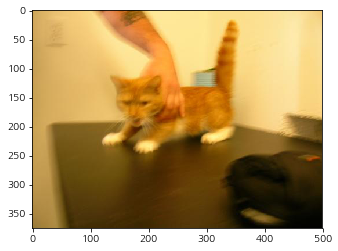

In [44]:
# 훈련셋 중 고양이 이미지 출력
import matplotlib.image as mpimg

image = mpimg.imread(os.path.join(train_dir_cat, source_fname_cat[0]))
# - 실제 이미지파일을 로딩해 각 픽셀별 색상농도값을 다차원배열로 변환해줌

plt.imshow(image)
plt.show()

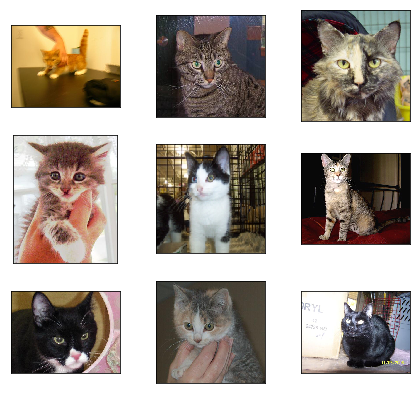

In [45]:
# 훈련셋 중 고양이 이미지 출력
fig = plt.figure(figsize = (6, 6))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.tight_layout()
    image = mpimg.imread(os.path.join(train_dir_cat, source_fname_cat[i]))
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])

In [46]:
# 원본이미지 강아지 파일명 목록 확보 
source_fname_dog = []
for root, dirs, files in os.walk(source_dir_dog): 
    print('원본이미지 강아지 폴더경로: %s' % root)
    print('원본이미지 강아지 파일갯수: %s' % len(files))
    for i in files:
        source_fname_dog.append(i)

# 샘플이미지 훈련셋_강아지 파일 복사
for i in source_fname_dog[0:1000]:
    src = os.path.join(source_dir_dog, i)
    dst = os.path.join(train_dir_dog, i)
    shutil.copyfile(src, dst)

print()

# 샘플이미지 훈련셋_강아지 파일 폴더경로 & 파일갯수
for root, dirs, files in os.walk(train_dir_dog): 
    print('샘플이미지 훈련셋_강아지 폴더경로: %s' % root)
    print('샘플이미지 훈련셋_강아지 파일갯수: %s' % len(files))

원본이미지 강아지 폴더경로: ./datapic/PetImages/Dog
원본이미지 강아지 파일갯수: 12500

샘플이미지 훈련셋_강아지 폴더경로: ./datapic/PetImages/sample\train\dog
샘플이미지 훈련셋_강아지 파일갯수: 1000


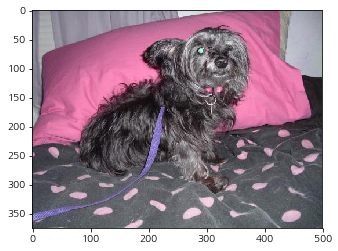

In [47]:
# 훈련셋 중 강아지 이미지 출력
import matplotlib.image as mpimg

image = mpimg.imread(os.path.join(train_dir_dog, source_fname_dog[0]))
# - 실제 이미지파일을 로딩해 각 픽셀별 색상농도값을 다차원배열로 변환해줌

plt.imshow(image)
plt.show()

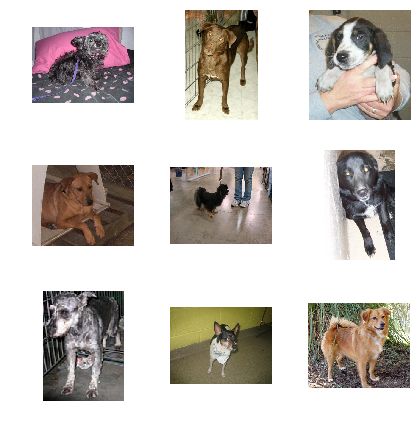

In [48]:
# 훈련셋 중 강아지 이미지 출력
fig = plt.figure(figsize = (6, 6))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.tight_layout()
    image = mpimg.imread(os.path.join(train_dir_dog, source_fname_dog[i]))
    plt.imshow(image)
    # plt.xticks([])
    # plt.yticks([])
    plt.axis('off')

#### 검증용(valid) 샘플파일 복사

In [49]:
# 원본이미지 고양이 파일명 목록 확보 
source_fname_cat = []
for root, dirs, files in os.walk(source_dir_cat): 
    print('원본이미지 고양이 폴더경로: %s' % root)
    print('원본이미지 고양이 파일갯수: %s' % len(files))
    for i in files:
        source_fname_cat.append(i)

# 샘플이미지 검증셋_고양이 파일 복사
for i in source_fname_cat[1000:1500]:
    src = os.path.join(source_dir_cat, i)
    dst = os.path.join(valid_dir_cat, i)
    shutil.copyfile(src, dst)

print()

# 샘플이미지 검증셋_고양이 파일 폴더경로 & 파일갯수
for root, dirs, files in os.walk(valid_dir_cat): 
    print('샘플이미지 검증셋_고양이 폴더경로: %s' % root)
    print('샘플이미지 검증셋_고양이 파일갯수: %s' % len(files))

원본이미지 고양이 폴더경로: ./datapic/PetImages/Cat
원본이미지 고양이 파일갯수: 12500

샘플이미지 검증셋_고양이 폴더경로: ./datapic/PetImages/sample\valid\cat
샘플이미지 검증셋_고양이 파일갯수: 500


In [50]:
# 원본이미지 강아지 파일명 목록 확보 
source_fname_dog = []
for root, dirs, files in os.walk(source_dir_dog): 
    print('원본이미지 강아지 폴더경로: %s' % root)
    print('원본이미지 강아지 파일갯수: %s' % len(files))
    for i in files:
        source_fname_dog.append(i)

# 샘플이미지 검증셋_강아지 파일 복사
for i in source_fname_dog[1000:1500]:
    src = os.path.join(source_dir_dog, i)
    dst = os.path.join(valid_dir_dog, i)
    shutil.copyfile(src, dst)

print()

# 샘플이미지 검증셋_강아지 파일 폴더경로 & 파일갯수
for root, dirs, files in os.walk(valid_dir_dog): 
    print('샘플이미지 검증셋_강아지 폴더경로: %s' % root)
    print('샘플이미지 검증셋_강아지 파일갯수: %s' % len(files))

원본이미지 강아지 폴더경로: ./datapic/PetImages/Dog
원본이미지 강아지 파일갯수: 12500

샘플이미지 검증셋_강아지 폴더경로: ./datapic/PetImages/sample\valid\dog
샘플이미지 검증셋_강아지 파일갯수: 500


#### 테스트용(test) 샘플파일 복사

In [51]:
# 원본이미지 고양이 파일명 목록 확보 
source_fname_cat = []
for root, dirs, files in os.walk(source_dir_cat): 
    print('원본이미지 고양이 폴더경로: %s' % root)
    print('원본이미지 고양이 파일갯수: %s' % len(files))
    for i in files:
        source_fname_cat.append(i)

# 샘플이미지 테스트셋_고양이 파일 복사
for i in source_fname_cat[1500:2000]:
    src = os.path.join(source_dir_cat, i)
    dst = os.path.join(test_dir_cat, i)
    shutil.copyfile(src, dst)

print()

# 샘플이미지 테스트셋_고양이 파일 폴더경로 & 파일갯수
for root, dirs, files in os.walk(test_dir_cat): 
    print('샘플이미지 테스트셋_고양이 폴더경로: %s' % root)
    print('샘플이미지 테스트셋_고양이 파일갯수: %s' % len(files))

원본이미지 고양이 폴더경로: ./datapic/PetImages/Cat
원본이미지 고양이 파일갯수: 12500

샘플이미지 테스트셋_고양이 폴더경로: ./datapic/PetImages/sample\test\cat
샘플이미지 테스트셋_고양이 파일갯수: 500


In [52]:
# 원본이미지 강아지 파일명 목록 확보 
source_fname_dog = []
for root, dirs, files in os.walk(source_dir_dog): 
    print('원본이미지 강아지 폴더경로: %s' % root)
    print('원본이미지 강아지 파일갯수: %s' % len(files))
    for i in files:
        source_fname_dog.append(i)

# 샘플이미지 테스트셋_강아지 파일 복사
for i in source_fname_dog[1500:2000]:
    src = os.path.join(source_dir_dog, i)
    dst = os.path.join(test_dir_dog, i)
    shutil.copyfile(src, dst)

print()

# 샘플이미지 테스트셋_강아지 파일 폴더경로 & 파일갯수
for root, dirs, files in os.walk(test_dir_dog): 
    print('샘플이미지 테스트셋_강아지 폴더경로: %s' % root)
    print('샘플이미지 테스트셋_강아지 파일갯수: %s' % len(files))

원본이미지 강아지 폴더경로: ./datapic/PetImages/Dog
원본이미지 강아지 파일갯수: 12500

샘플이미지 테스트셋_강아지 폴더경로: ./datapic/PetImages/sample\test\dog
샘플이미지 테스트셋_강아지 파일갯수: 500


# <font color = 'blue'>이미지파일 데이터셋 만들기</font>

### 이미지데이터 증식(증강;부풀리기: Data Augmentation)을 통한 데이터셋 만들기
* 분석대상 이미지에 랜덤하게 임의로 변형을 가하는 작업
* 주어진 데이터 갯수에 비해 더 많은 이미지를 대상으로 훈련을 실시해 
<br>과적합 (overfitting)을 방지하고, 새로운 이미지에 대한 예측모델의 일반화(genaralization) 가능성을 높임

In [53]:
# 무작위 시드넘버 설정으로 샘플 재현성 확보
myseed = 10

import numpy as np
np.random.seed(myseed)

### 이미지 증식방식을 이용한 데이터셋 생성

In [54]:
# 이미지파일 데이터셋 제네레이션 모듈 준비
from keras.preprocessing.image import ImageDataGenerator

# 이미지파일 데이터셋 제네레이션 모듈 인스턴스 객체화

# 훈련데이터 증식용 객체생성
imgen_aug = ImageDataGenerator(rescale = 1./255, 
                               rotation_range = 40,
                               width_shift_range = 0.2,
                               height_shift_range = 0.2,
                               shear_range = 0.2,
                               zoom_range = 0.2,
                               horizontal_flip = True,
                               vertical_flip = True,
                               fill_mode = 'nearest')

# 검증데이터와 테스트데이터용 일반 객체생성
imgen = ImageDataGenerator(rescale = 1./255)

# - 하드디스크에 저장된 물리적인 이미지파일을 분석용 수치데이터셋으로 
#   변환/생성(제네레이션) 하는 기능을 별도의 객체로 만들어 냄

# - rescale = 1./255 옵션사용으로 딥러닝 연산에 적합한 스케일링 미리 실시해 로딩하는 것도 좋음
#             사용하지 않으면, 원본이미지의 픽셀별 색상농도 0~255 수치가 그대로 로딩되며, 
#             별도로 스케일링 전처리를 해주면 됨

In [55]:
# 이미지파일 데이터셋 생성객체 이용
# 훈련데이터셋 생성하기(제네레이션)
trainset = imgen_aug.flow_from_directory(
    directory = train_dir, 
    color_mode = 'rgb',
    target_size = (150, 150), 
    batch_size = 20, 
    class_mode = 'binary')

validset = imgen.flow_from_directory(
    directory = valid_dir, 
    color_mode = 'rgb',
    target_size = (150, 150), 
    batch_size = 20, 
    class_mode = 'binary')

testset = imgen.flow_from_directory(
    directory = test_dir, 
    color_mode = 'rgb',
    target_size = (150, 150), 
    batch_size = 20, 
    class_mode = 'binary')

# - directory: 해당 디렉토리 내에 분류예측대상 이미지파일을 레이블별로 폴더를 만들어서 저장해 놓아야 함
# - color_mode: 흑백이미지(grayscale), 컬러이미지(rgb)
# - target_size: 저장되어 있는 이미지 파일 로딩시 통일된 픽셀규격(가로, 세로)으로 로딩해줌
# - batch_size: 이미지파일을 메모리로 로딩시 몇 개씩 나누어서 처리할 것인지 설정
#               batsh_size = 3이므로 훈련용 이미지 45개 / 3배치 = 15개 epochs로 로딩됨
#               batsh_size = 3이므로 테스트용 이미지 15갸 / 3배치 = 5개 epochs로 로딩됨
# - class_mode: 분류예측용 레이블 숫자 생성
#               binary:이항분류 [1, 0], [0, 1]
#               categorical:다항분류 [1, 0, 0], [0, 1, 0], [0, 0, 1]
#               sparse:1차원 정수분류 [0, 1, 2] 

# - classes 옵션을 사용하지 않으면, 폴더명 알파벳순으로 0: cat, 1: dog라는 클래스 레이블이 부여됨
# - classes = ['dog', 'cat']으로 설정하면, 0: dog, 1: cat으로 클래스 레이블이 부여됨  

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# <font color = 'blue'>데이터 기본탐색</font>

### 훈련용(train) 이미지파일 데이터셋

#### 이미지파일 로딩환경

In [56]:
# 이미지파일 로딩을 통해 수치데이터로 만드는 과정
for data_batch, labels_batch in trainset:
    print('배치(batch) 데이터 크기:', data_batch.shape)
    print('배치(batch) 레이블 크기:', labels_batch.shape)
    break

# - 피처셋: (배치크기, 가로픽셀수, 세로픽셀수, 색상채널)
# - 타겟변수: (배치크기)

배치(batch) 데이터 크기: (20, 150, 150, 3)
배치(batch) 레이블 크기: (20,)


In [57]:
print('이미지파일 로딩 경로:', trainset.directory)
print('이미지파일 로딩 갯수:', trainset.n)
print('이미지파일 로딩 갯수:', trainset.samples)
print('이미지파일 로딩 배치(batch) 크기:', trainset.batch_size)
print('이미지파일 로딩 에포크(epochs) 크기:', len(trainset))

이미지파일 로딩 경로: ./datapic/PetImages/sample\train
이미지파일 로딩 갯수: 2000
이미지파일 로딩 갯수: 2000
이미지파일 로딩 배치(batch) 크기: 20
이미지파일 로딩 에포크(epochs) 크기: 100


In [58]:
# 이미지파일 로딩경로와 파일명
trainset.filenames

['cat\\0.jpg',
 'cat\\1.jpg',
 'cat\\10.jpg',
 'cat\\100.jpg',
 'cat\\1000.jpg',
 'cat\\10000.jpg',
 'cat\\10001.jpg',
 'cat\\10002.jpg',
 'cat\\10003.jpg',
 'cat\\10004.jpg',
 'cat\\10005.jpg',
 'cat\\10006.jpg',
 'cat\\10007.jpg',
 'cat\\10008.jpg',
 'cat\\10009.jpg',
 'cat\\1001.jpg',
 'cat\\10010.jpg',
 'cat\\10011.jpg',
 'cat\\10012.jpg',
 'cat\\10013.jpg',
 'cat\\10014.jpg',
 'cat\\10015.jpg',
 'cat\\10016.jpg',
 'cat\\10017.jpg',
 'cat\\10018.jpg',
 'cat\\10019.jpg',
 'cat\\1002.jpg',
 'cat\\10020.jpg',
 'cat\\10021.jpg',
 'cat\\10022.jpg',
 'cat\\10023.jpg',
 'cat\\10024.jpg',
 'cat\\10025.jpg',
 'cat\\10026.jpg',
 'cat\\10027.jpg',
 'cat\\10028.jpg',
 'cat\\10029.jpg',
 'cat\\1003.jpg',
 'cat\\10030.jpg',
 'cat\\10031.jpg',
 'cat\\10032.jpg',
 'cat\\10033.jpg',
 'cat\\10034.jpg',
 'cat\\10035.jpg',
 'cat\\10036.jpg',
 'cat\\10037.jpg',
 'cat\\10038.jpg',
 'cat\\10039.jpg',
 'cat\\1004.jpg',
 'cat\\10040.jpg',
 'cat\\10041.jpg',
 'cat\\10042.jpg',
 'cat\\10043.jpg',
 'cat\\1004

#### 이미지파일 특성규격

In [59]:
print('이미지파일 색상채널 유형:', trainset.color_mode)
# - color_mode 옵션사용시 흑백:gryscale, 컬러:rgb

print('이미지파일 데이터 저장특성:', trainset.data_format)
# - channels_last: (가로픽셀수, 세로픽셀수, 색상채널)
# - channel_first: (색상채녈, 가로픽셀수, 세로픽셀수)

print('이미지파일 로딩규격:', trainset.target_size)

print('이미지파일 특성규격:', trainset.image_shape)
# - 가로픽셀수, 세로픽셀수, 색상유형

print('이미지파일 데이터 타입:', trainset.dtype)
# - 이미지마다의 각 픽셀별 색상농도수치가 실수형32비트로 로딩됨

print('이미지파일 픽셀과 픽셀사이, 점과 점사이 연결방법:', trainset.interpolation)
# - nearest: 부드럽게 처리, none: 일반 직선모양

이미지파일 색상채널 유형: rgb
이미지파일 데이터 저장특성: channels_last
이미지파일 로딩규격: (150, 150)
이미지파일 특성규격: (150, 150, 3)
이미지파일 데이터 타입: float32
이미지파일 픽셀과 픽셀사이, 점과 점사이 연결방법: nearest


#### 이미지파일 클래스 레이블

In [60]:
print('이미지파일 클래스 유형:', trainset.class_mode)
# - binary:이항분류, categorical:다항분류, sparse:1차원 정수

print('이미지파일 클래스 유형개수:', trainset.num_classes)

print('\n이미지파일 클래스별 레이블과 번호:\n', trainset.class_indices)
# - 하드디스크에 저장되어 있는 폴더명&순서를 그대로 가져와서 사용함

print('\n이미지파일 마다 부여된 클래스 번호:\n', trainset.classes)

이미지파일 클래스 유형: binary
이미지파일 클래스 유형개수: 2

이미지파일 클래스별 레이블과 번호:
 {'cat': 0, 'dog': 1}

이미지파일 마다 부여된 클래스 번호:
 [0 0 0 ... 1 1 1]


# <font color = 'blue'>딥러닝 모델링</font>

### 컨브넷 라이브러리 로딩

In [61]:
# 사전에 학습된 컨브넷 객체 로딩
from keras.applications import VGG16

In [62]:
# 컨브넷 사용방식 설계를 통한 객체화
conv = VGG16(weights = 'imagenet', 
             include_top = False, 
             input_shape = (150, 150, 3))

# wights = 'imagenet' ImageNet 데이터셋에서 훈련된 컨브넷을 사용한다는 의미
# - include_top = True: vgg16모델의 1000개 레이블 분류기 사용한다는 설정
# - include_top = False: vgg16모델의 1000개 레이블 분류가 아닌 사용자가 임의로 설정한 분류기 사용
#                 지금은 고양이와 강아지 2개 레이블을 분류하는 예제이므로 False로 설정함
# - input_shape 옵션에 vgg16모델의 원래 입력층 규격인 (224, 224) 이외에 사용자가 지정한 규격 설정

In [63]:
# 컨브넷 설계내용 확인
conv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

### 벡터이미지 형태로 컨브넷 설계내용 확인

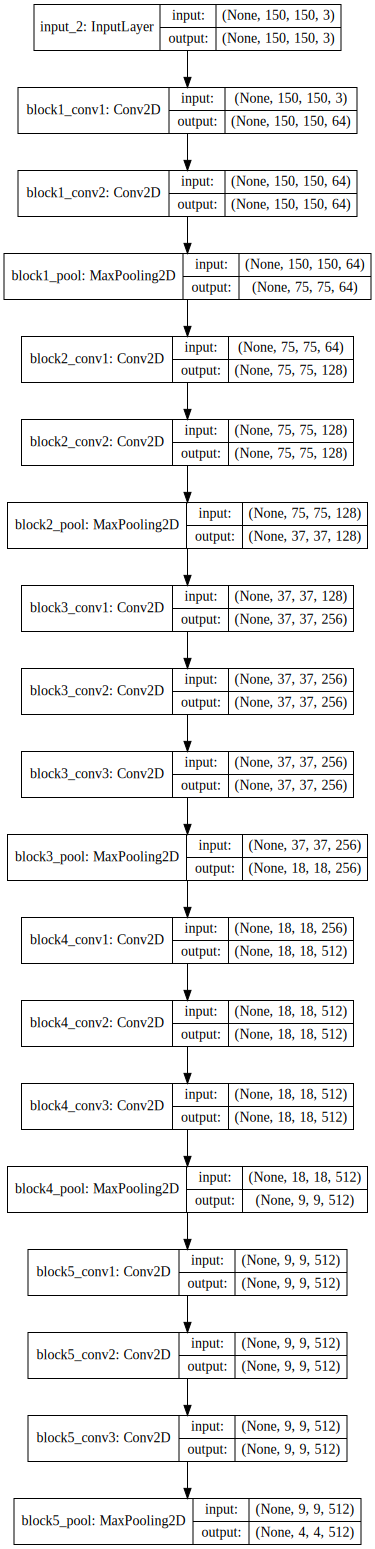

In [64]:
# 벡터이미지 형태로 신경망모델 설계내용 확인
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(conv, show_shapes = True).create(prog = 'dot', format = 'svg'))

### 딥러닝 라이브러리 로딩

In [65]:
# 딥러닝 관련 라이브러리
import tensorflow as tf
# - 딥러닝 학습알고리즘

In [66]:
from keras.models import Sequential
# - 딥러닝 학습계층을 순차적으로 쌓아올릴 수 있도록 해줌

from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
# - Dense: 딥러닝 학습계층별 노드/유닛을 밀집시켜 학습방법을 설정할 수 있도록 해줌
# - Dropout: 은닉층에 배치된 노두 중 일부를 임의로 비활성화 시킴
# - Flatten: 컨볼루션층이나 맥스풀링의 2차원(가로X세로) 배열을 1차원으로 바꾸어 주는 기능
# - Conv2D: 분석대상 이미지의 세부영역별 특징을 마스크 필터를 적용해 추출하는 기능
# - MaxPooling2D: 분석대상 이미지의 세부영역별 대표특징값을 추출하는 기능

### 딥러닝 학습계층 설정

In [67]:
md = Sequential()

# 입력층: 컨브넷
md.add(conv)

# 은닉층: 플래튼
md.add(Flatten())

# 은닉층: 덴스층
md.add(Dense(256, activation = 'relu'))

# 출력층: 덴스층
md.add(Dense(1, activation = 'sigmoid'))

md.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


### 벡터이미지 형태로 신경망모델 설계내용 확인

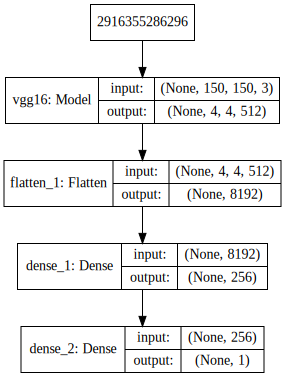

In [68]:
# 벡터이미지 형태로 신경망모델 설계내용 확인
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(md, show_shapes = True).create(prog = 'dot', format = 'svg'))

### 딥러닝 학습방법 설정

In [69]:
# 준비된 학습계층의 학습방법 설정
md.compile(loss = 'binary_crossentropy', 
            optimizer = 'adam', metrics = ['accuracy'])
# - loss: 학습시 오차를 어떻방법으로 계산할지 설정
# - optimizser: 발생하는 오차를 어떤방법으로 줄여나갈지 설정
#   binary_crossentropy: 이항분류(binary-class classification)에 적합함
#   categorical_crossentropy: 다항분류(multi-class classification)에 적합함
# - metrics: 모형의 성능을 평가하는 기준으로 어떤 것을 사용할지 설정

### 학습모델 파일저장 옵션 설정

In [70]:
# 딥러닝 학습모델 저장폴더명 설정
import os

md_dir = './model/'
if not os.path.exists(md_dir):
    os.mkdir(md_dir)
    
# 딥러닝 학습모델별 저장파일명 변경설정
md_path = './model/vloss{val_loss:.3f}_vacc{val_acc:.3f}_ep{epoch:d}.hdf5'
# - loss: 전체데이터 중 훈련셋(training) 학습오차
# - acc: 전체데이터 중 훈련셋(training) 정확도
# - val_loss: 전체데이터 중 검증셋(validation) 오차
# - val_acc: 전체데이터 중 검증셋(validation) 정확도

# ep{epoch:d} 단위배치(batch) 작업인 엑폭번호를 정수형으로 파일명 시작부분에 기록
# vloss{val_loss:.3f} 각 학습모델의 검증데이터 오차정도를 소수3자리까지 파일에 기록
# vacc{val_acc:.3f} 각 학습모델의 검증데이터 정확정도를 소수3째자리까지 파일에 기록

### 학습모델 체크포인트 옵션 설정

In [71]:
# 학습모델 체크포인트 모듈 로딩
from keras.callbacks import ModelCheckpoint

In [72]:
# 체크포인트(checkpoint) 변경설정
cp = ModelCheckpoint(filepath = md_path, 
                     monitor = 'val_loss', 
                     verbose = 1, 
                     save_best_only = True)
# - filepath: 각 학습모델별 성능평가 파일저장 경로
# - monitor 옵션: 각 학습모델별 성능평가 기준
#   * 전체데이터 중 훈련셋(training) 학습오차: loss
#   * 전체데이터 중 훈련셋(training) 정확도: acc
#   * 전체데이터 중 검증셋(validation) 오차: val_loss
#   * 전체데이터 중 검증셋(validation) 정확도: val_acc
#   * 전체데이터 중 시험셋(테스트; test)은 별도로 분할해 놓아야 함
# - verbose: 모델별 학습진행사항 출력
# - save_best_only: 각 학습모델별 성능평가 파일저장시
#                   이전 모델보다 성능이 좋아졌을 때만 저장하도록 함

### 학습모델 과적합 방지 옵션 설정

In [73]:
# 과적합 방지용 종료 메서드 로딩
from keras.callbacks import EarlyStopping

In [74]:
# 조기종료 옵션설정
es = EarlyStopping(monitor = 'val_loss', patience = 10)
# - monitor: 검증셋 대상 모니터할 값 설정
# - patience: 검증셋 오차가 좋아지지 않아도 몇 번까지 기다릴지 설정

### 딥러닝 모델에 데이터 피팅

In [ ]:
# 딥러닝 모델 최적화 훈련진행
md_hist = md.fit_generator(
    trainset,  
    epochs = 50, 
    steps_per_epoch = 100, 
    validation_data = validset,
    validation_steps = 50,
    verbose = 1, 
    callbacks = [cp, es])

# <font color = 'blue'>딥러닝 모델 성능평가</font>

### 딥러닝 학습모델 성능평가 히스토리

In [ ]:
# 딥러닝 학습실시에 따른 성능평가 히스토리 확보

md_train_loss = md_hist.history['loss'] # 훈련셋 오차
md_train_acc = md_hist.history['acc'] # 훈련셋 정확도
md_valid_loss = md_hist.history['val_loss'] # 검증셋 오차
md_valid_acc = md_hist.history['val_acc'] # 검증셋 정확도

In [ ]:
# 딥러닝 학습실시에 따른 성능평가 히스토리 객체형식과 규모
print(type(md_train_loss), len(md_train_loss))
print(type(md_train_acc), len(md_train_acc))
print(type(md_valid_loss), len(md_valid_loss))
print(type(md_valid_acc), len(md_valid_acc))

In [ ]:
print('훈련셋   오차추이:', [round(i, 3) for i in md_train_loss])
print('테스트셋 오차추이:', [round(i, 3) for i in md_valid_loss])

print()

print('훈련셋   정확도추이:', [round(i, 3) for i in md_train_acc])
print('테스트셋 정확도추이:', [round(i, 3) for i in md_valid_acc])

### 딥러닝 학습모델 성능평가 그래프

#### md모델 훈련셋과 검증셋 성능비교

In [ ]:
# x축 설정
# - epochs에 의해서 딥러닝 학습모델이 수십~수백개 만들어저 진행됨에 따라
#   학습오차, 학습정확도, 검증오차, 검증정확도가 모두 수십~수백개 값이 생성됨
# - 그런데, callbacks = [cp, es] 파라미터 설정으로 
#   개선된 베스트모델&과적합방지 학습모델에 대해서만 제한적으로  
#   학습오차, 학습정확도, 검증오차, 검증정확도가 기록됨  
#   [cp] 학습모델별 성능평가파일 생성시 
#        이전파일보다 성능이 개선된 베스트모델을 저장옵션
#   [es] 딥러닝 과적합방지용 조기종료 옵션 
md_x_len = np.arange(len(md_train_loss))
md_x_len

In [ ]:
# 딥러닝학습 훈련셋과 검증셋 오차 추이
plt.plot(md_x_len, md_valid_loss, 'mo--', label = '검증셋 오차')
plt.plot(md_x_len, md_train_loss, 'co--', label = '훈련셋 오차')

plt.title('딥러닝학습 훈련셋과 검증셋 오차 추이')
plt.xlabel('epoch', size = 12)
plt.ylabel('오차(loss)', size = 12)
plt.legend()

# 마커설정 옵션 'co--', 'mo--'
# --> color = 'cyan', marker = 'o', linestyle = '--' 로 풀어서 코딩가능
# --> color = 'magenta', marker = 'o', linestyle = '--' 로 풀어서 코딩가능

In [ ]:
# 딥러닝학습 훈련셋과 검증셋 정확도 추이
plt.plot(md_x_len, md_train_acc, 'co--', label = '훈련셋 정확도')
plt.plot(md_x_len, md_valid_acc, 'mo--', label = '검증셋 정확도')

plt.title('딥러닝학습 훈련셋과 검증셋 정확도 추이')
plt.xlabel('epoch', size = 12)
plt.ylabel('정확도(accuracy)', size = 12)
plt.legend()

In [ ]:
# 훈련셋 정확도와 검증셋 오차 추이
plt.plot(md_x_len, md_train_acc, color = 'blue', marker = 'o', 
         linestyle = '--', label = '훈련셋 정확도')
plt.plot(md_x_len, md_valid_loss, color = 'red', marker = 'o', 
         linestyle = '--', label = '검증셋 오차')
plt.title('딥러닝학습 훈련셋 정확도와 검증셋 오차 추이')
plt.xlabel('epoch', size = 12)
plt.ylabel('red: 오차 ----- blue: 정확도', size = 12)
plt.legend()

# 마커설정 옵션: color = 'red', marker = 'o', linestyle = '--'
# --> 'ro--'로 축약해서 설정가능함

### 모델 성능평가

#### md모델 훈련셋(train) 성능평가

In [ ]:
# 훈련셋을 활용한 딥러닝모델의 성능평가 결과
md_train_perf = md.evaluate_generator(trainset, steps = 100)
md_train_perf

# - ImageDataGenerater로 20개 이미지파일을 배치(batch)로 로딩하므로
#   step = 100으로 설정해 20(batch) * 100 = 2000개 훈련셋 이미지 파일을 로딩함 

In [ ]:
print('훈련셋 모델성능 종합:', [round(i, 3) for i in md_train_perf])
print(f'훈련셋 모델성능 오차(loss): {md_train_perf[0]:11.3f}')
print(f'훈련셋 모델성능 정확도(accuracy): {md_train_perf[1]:0.3f}')

#### md모델 테스트셋(test) 성능평가

In [ ]:
# 테스트셋을 활용한 딥러닝모델의 성능평가 결과
md_test_perf = md.evaluate_generator(testset, steps = 50)
md_test_perf

# - ImageDataGenerater로 20개 이미지파일을 배치(batch)로 로딩하므로
#   step = 100으로 설정해 20(batch) * 50 = 1000개 훈련셋 이미지 파일을 로딩함 

In [ ]:
print('테스트셋 모델성능 종합:', [round(i, 3) for i in md_test_perf])
print(f'테스트셋 모델성능 오차(loss): {md_test_perf[0]:11.3f}')
print(f'테스트셋 모델성능 정확도(accuracy): {md_test_perf[1]:0.3f}')

#### 훈련셋과 테스트셋 성능평가 비교

In [ ]:
# 오차(loss) 비교
md_diff_loss = md_test_perf[0] - md_train_perf[0] 

# 정확도(accuracy) 비교
md_diff_acc = md_test_perf[1] - md_train_perf[1] 

print(f'[오차      (loss)] 훈련셋: {md_train_perf[0]:0.3f}, 테스트셋: {md_test_perf[0]:0.3f}, 차이: {md_diff_loss:6.3f}')
print(f'[정확도(accuracy)] 훈련셋: {md_train_perf[1]:0.3f}, 테스트셋: {md_test_perf[1]:0.3f}, 차이: {md_diff_acc:0.3f}')

# End of Source